<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
 <h1 style="text-align:center;font-weight: bold;">Star classification project</h1>

![image.jpg](https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/06/gaia_observes_the_milky_way/24305944-1-eng-GB/Gaia_observes_the_Milky_Way_pillars.jpg)

####  [By Spacecraft: ESA/ATG medialab; Milky Way: ESA/Gaia/DPAC. Acknowledgement: A. Moitinho., CC BY-SA IGO 3.0, CC BY-SA 3.0 igo](https://commons.wikimedia.org/w/index.php?curid=119243221)

The goal of this project is to classify stars from a star catalogue. For this project, we will use some stars fro the [Gaia](https://www.esa.int/Science_Exploration/Space_Science/Gaia) space telescope from the European Space Agency. This telescope was launched in 2013 and were designed for astrometry. Astrometry consists in measuring the position, distance, magnitude and other properties from stars. 

Stellar classification is the classification of stars based on their sepctral characteristics. Theire are several different classification systems, but the most used one is th **Morgan-Keenan (MK)** system. This system uses letters: 
![image.png](https://upload.wikimedia.org/wikipedia/commons/3/37/Stellar_Classification_Chart.png)

[By Pablo Carlos Budassi - Own work, CC BY-SA 4.0](https://commons.wikimedia.org/w/index.php?curid=92588077)

You can find more information about stellar classification on [Wikipedia](https://en.wikipedia.org/wiki/Stellar_classification). The dataset we'll use is from [kaggle](https://www.kaggle.com/datasets/realkiller69/gaia-stars-dataset-from-dr3-data-release-3/data). It consist on a subset of the data from Gaia (hopefully we don't work with all the objects captured by the telescope, because they are 1800 million !)

In [1]:
# general imports 
import polars as pl 
import pandas as pd 
import numpy as np
import itertools
import warnings


# Plotting tools import 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.colors as mpl_colors

# Astronomy imports 
from astropy.coordinates import SkyCoord
from astropy import units as u

# ML imports 
from sklearn.preprocessing import LabelEncoder

# Filter warnings 
warnings.filterwarnings('ignore', category=matplotlib.MatplotlibDeprecationWarning)

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">1. Explorative data analysis</h1>

First let's import our dataset into a polars dataframe. Polars is an alternative for pandas, writen in Rust. The performance of this library are generally better then polars, and the queries on the dataframe are close to SQL queries. Check the [library](https://pola.rs/) !

In [2]:
df = pl.read_csv('/kaggle/input/gaia-stars-dataset-from-dr3-data-release-3/dataGaia2.csv')
print(f'The dataframe has {df.shape[1]} columns and {df.shape[0]} rows')
df.head()

The dataframe has 50 columns and 626016 rows


shape: (5, 50)
┌─────┬───────────┬───────────┬───────────────────┬───┬──────────┬─────────┬─────────┬────────┐
│     ┆ RA_ICRS   ┆ DE_ICRS   ┆ Source            ┆ … ┆ Flags-HS ┆ EWHa    ┆ e_EWHa  ┆ f_EWHa │
│ --- ┆ ---       ┆ ---       ┆ ---               ┆   ┆ ---      ┆ ---     ┆ ---     ┆ ---    │
│ i64 ┆ f64       ┆ f64       ┆ i64               ┆   ┆ i64      ┆ f64     ┆ f64     ┆ i64    │
╞═════╪═══════════╪═══════════╪═══════════════════╪═══╪══════════╪═════════╪═════════╪════════╡
│ 0   ┆ 44.589012 ┆ 2.195298  ┆ 1306361548360576  ┆ … ┆ 92       ┆ 0.02128 ┆ 0.19309 ┆ 0      │
│ 1   ┆ 35.358035 ┆ 8.988813  ┆ 23700286669971584 ┆ … ┆ 92       ┆ 0.02144 ┆ 0.176   ┆ 0      │
│ 2   ┆ 44.450767 ┆ 10.079118 ┆ 27109837867995776 ┆ … ┆ 92       ┆ 0.13726 ┆ 0.13364 ┆ 0      │
│ 3   ┆ 48.404909 ┆ 15.105912 ┆ 31009771252186752 ┆ … ┆ 93       ┆ 0.0947  ┆ 0.10548 ┆ 0      │
│ 4   ┆ 57.092838 ┆ 11.550927 ┆ 36876009385300352 ┆ … ┆ 92       ┆ 0.08682 ┆ 0.07831 ┆ 0      │
└─────┴───────────┴───────────┴───────────────────┴───┴──────────┴─────────┴─────────┴────────┘

There are a lot of columns, we won't keep them all. 

There are some more detailed information on the data on the [Gaia website](https://www.cosmos.esa.int/web/gaia/dr3https://www.cosmos.esa.int/web/gaia/dr3)


We will remove some of these columns from the start of this work because they are not relevant in this study and we won't use them in any statistics. We also do some basic preprocessing to be able to work with the data: 

- Strip the `SpType-ELS` column 
- Change the datatype of the column `Age-Flame` from string to float.

Here are all the columns 

In [3]:
for column in df.columns:
    print(column)


RA_ICRS
DE_ICRS
Source
e_RA_ICRS
e_DE_ICRS
Plx
e_Plx
PM
pmRA
e_pmRA
pmDE
e_pmDE
RUWE
Gmag
e_Gmag
BPmag
e_BPmag
RPmag
e_RPmag
GRVSmag
e_GRVSmag
RV
logg
[Fe/H]
Dist
PQSO
PGal
Pstar
PWD
Pbin
Teff
A0
AG
ABP
ARP
E(BP-RP)
GMAG
Rad
Rad-Flame
Lum-Flame
Mass-Flame
Age-Flame
z-Flame
Evol
SpType-ELS
Flags-HS
EWHa
e_EWHa
f_EWHa


In [4]:
to_drop = [
    'Source',
    'e_RA_ICRS',
    'e_DE_ICRS',
    'Plx',
    'e_Plx',
    'PM',
    'pmRA',
    'e_pmRA',
    'pmDE',
    'e_pmDE',
    'RUWE',
    'e_Gmag',
    'e_BPmag',
    'e_RPmag',
    'GRVSmag',
    'e_GRVSmag',
    'RV',
    'PQSO',
    'PGal',
    'Pstar',
    'PWD',
    'Pbin',
    'A0',
    'E(BP-RP)',
    'Flags-HS',
    'EWHa',
    'e_EWHa',
    'f_EWHa'
]
df = df.drop(to_drop)

# strip the stellar types
df = df.with_columns(pl.col('SpType-ELS').str.strip_chars())

# Change the data type for Age-Flame
df = df.with_columns(pl.col('Age-Flame').cast(pl.Float64))

print(df.shape)

(626016, 22)


Here is a description of the remaining columns: 

- RA_ICRS: 
    Right ascension in the ICRS (International Celestial Reference System) coordinate system
- DE_ICRS: Declination in the ICRS coordinate system
- Gmag: Average apparent magnitude integrated in the G band
- BPmag: Average apparent magnitude integrated in the BP blue band
- RPmag: Average apparent magnitude integrated in the RP red band
- logg: Surface gravity
- [Fe/H]: Metallicity
- Dist: Distance to the celestial object: inverse of the parallax, in parsecs
- Teff: Estimated effective temperature of the celestial object by Gaia in Kelvins
- GMAG: Absolute Gmag estimated from Gaia
- AG: Extintion in G band
- ABP: Extintion in BP band
- ARP: Extintion in RP band
- Rad: Object radius estimate in terms of solar radius
- Lum-Flame: Estimated object luminosity in terms of solar luminosity
- Mass-Flame: Mass estimate in terms of solar mass
- Age-Flame: Celestial object age in giga years
- z-Flame: Redshift in km/s
- Evol: Evol stage
- SpType-ELS: Estimated spectral class by Gaia


First, let's take a brief look at the coordinates of our stars. The next plot is a `Aitoff` projection, commonly used in astronomy, of the position of the stars. We give each star type a color.

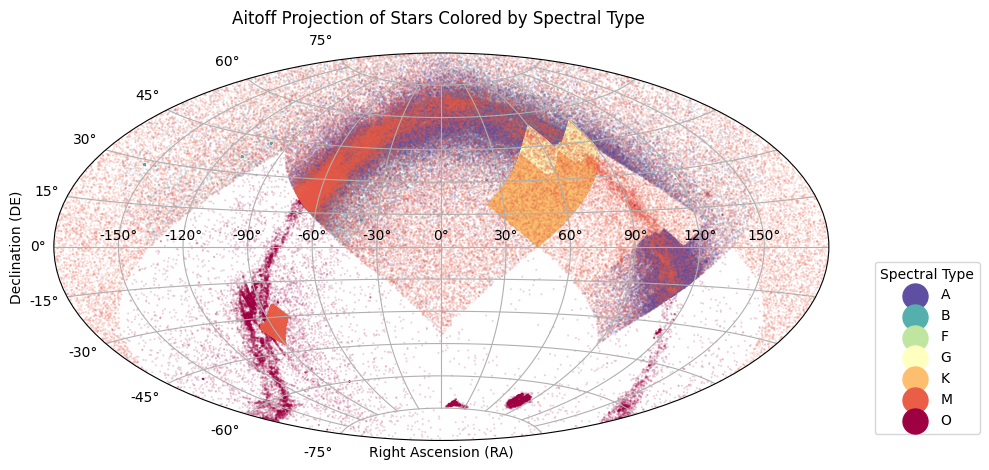

In [5]:
coords = SkyCoord(ra=df['RA_ICRS'].to_numpy(), dec=df['DE_ICRS'].to_numpy(), unit='deg')
ra_rad = coords.ra.wrap_at(180 * u.deg).radian
dec_rad = coords.dec.radian

unique_spectral_types = np.sort(df['SpType-ELS'].unique().to_numpy())

color_map = plt.cm.get_cmap('Spectral_r', len(unique_spectral_types))
spectral_type_to_color = {stype: color_map(i) for i, stype in enumerate(unique_spectral_types)}
colors = [spectral_type_to_color[stype] for stype in df['SpType-ELS'].to_numpy()]
my_colors = list(map(lambda x: x[1], sorted([(k, v) for k, v in spectral_type_to_color.items()], key=lambda x: x[0])))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='aitoff')
scatter = ax.scatter(ra_rad, dec_rad, s=0.2, c=colors, alpha=0.2)

for stype, color in spectral_type_to_color.items():
    ax.scatter([], [], c=[color], label=stype)

plt.title('Aitoff Projection of Stars Colored by Spectral Type \n')
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (DE)')
plt.grid(True)
plt.legend(loc='lower left', bbox_to_anchor=(1.05, 0), title='Spectral Type', markerscale=3)
plt.show()

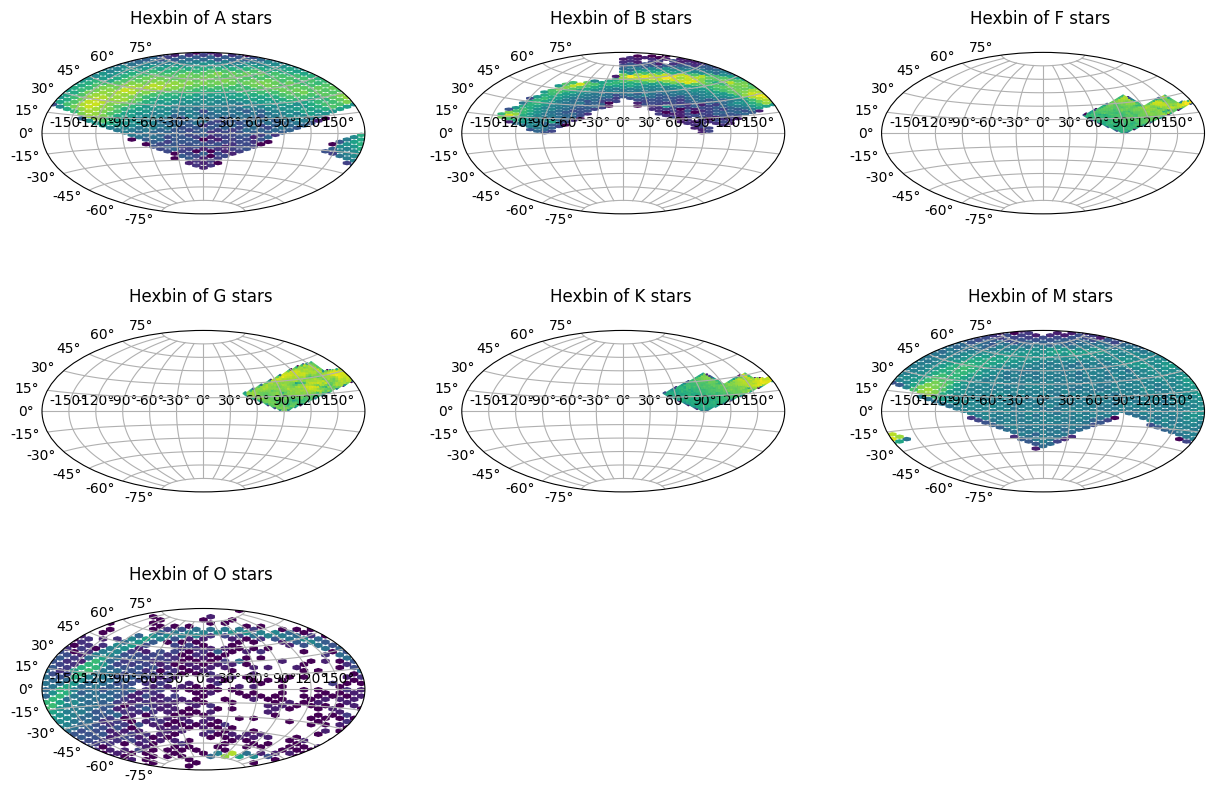

In [6]:
fig, axes = plt.subplots(nrows=(len(unique_spectral_types) + 2) // 3, ncols=3, figsize=(15, 10), subplot_kw={'projection': 'aitoff'})
fig.subplots_adjust(hspace=0.3, wspace=0.3)

axes = axes.flatten()

for i, spectral_type in enumerate(unique_spectral_types):
    
    plot_df = df.filter(pl.col('SpType-ELS') == spectral_type)
    coords = SkyCoord(ra=plot_df['RA_ICRS'].to_numpy(), dec=plot_df['DE_ICRS'].to_numpy(), unit='deg')
    ra_rad = coords.ra.wrap_at(180 * u.deg).radian
    dec_rad = coords.dec.radian
    
    axes[i].hexbin(ra_rad, dec_rad, gridsize=45, bins='log')
    axes[i].set_title(f'Hexbin of {spectral_type.strip()} stars \n ')
    axes[i].grid(True)

for i in range(len(unique_spectral_types), len(axes)):
    axes[i].axis('off')


The repartition of the stars in the sky is not equaly distrubited, but this should not affect our study. 

Let's take a look to our response variable, `SpType-ELS`

Text(0, 0.5, 'Count')

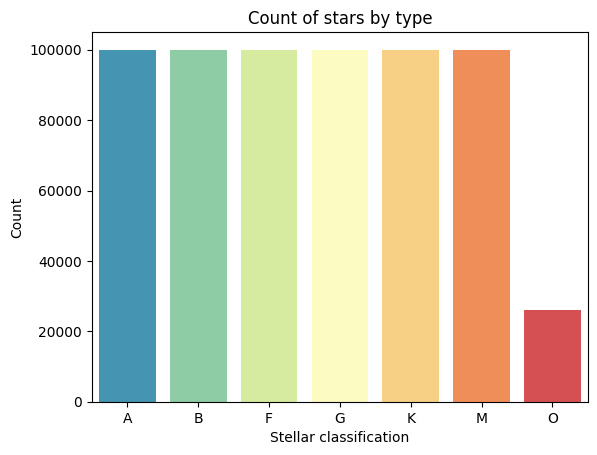

In [7]:
plot_df = (
    df
    .group_by(pl.col('SpType-ELS'))
    .agg(pl.len().alias('Count'))
    .sort('SpType-ELS')
)

plot = sns.barplot(x=plot_df['SpType-ELS'].to_numpy(), 
                   y=plot_df['Count'].to_numpy(), 
                   palette='Spectral_r', 
                   saturation=0.9
                  )
plot.set_title('Count of stars by type')
plot.set_xlabel('Stellar classification')
plot.set_ylabel('Count')

we have unbalanced data. We will take care of that later.

Another interesting thing with stars is the HR diagram (Hertzsprung-Russell diagram). The diagrams shows the relationship between stars magnitude and effective temperature. More information about this diagram on [Wikipedia](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram).

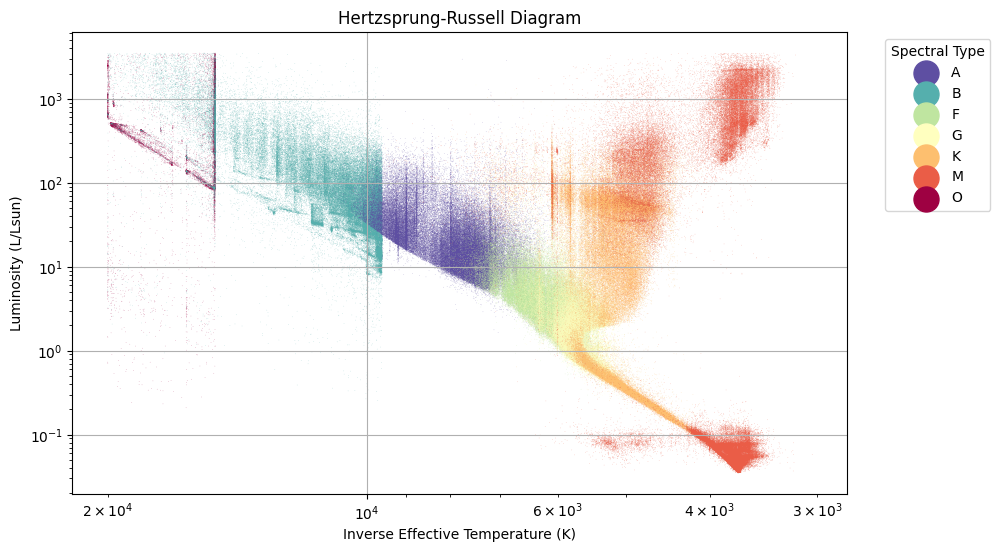

In [8]:
temperature = df['Teff'].to_numpy() 
luminosity = df['Lum-Flame'].to_numpy()  


plt.figure(figsize=(10, 6))
plt.scatter(temperature, 
            luminosity, 
            c=colors, 
            s=0.2,
            alpha=0.5, 
            edgecolor='none')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Inverse Effective Temperature (K)')
plt.ylabel('Luminosity (L/Lsun)')
plt.title('Hertzsprung-Russell Diagram')

for stype, color in spectral_type_to_color.items():
    plt.scatter([], [], c=[color], label=stype)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title='Spectral Type', markerscale=3)
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

This graphic is very interesting and already show some differences between the stars given their classification. Let's look to this diagram for each spectral type

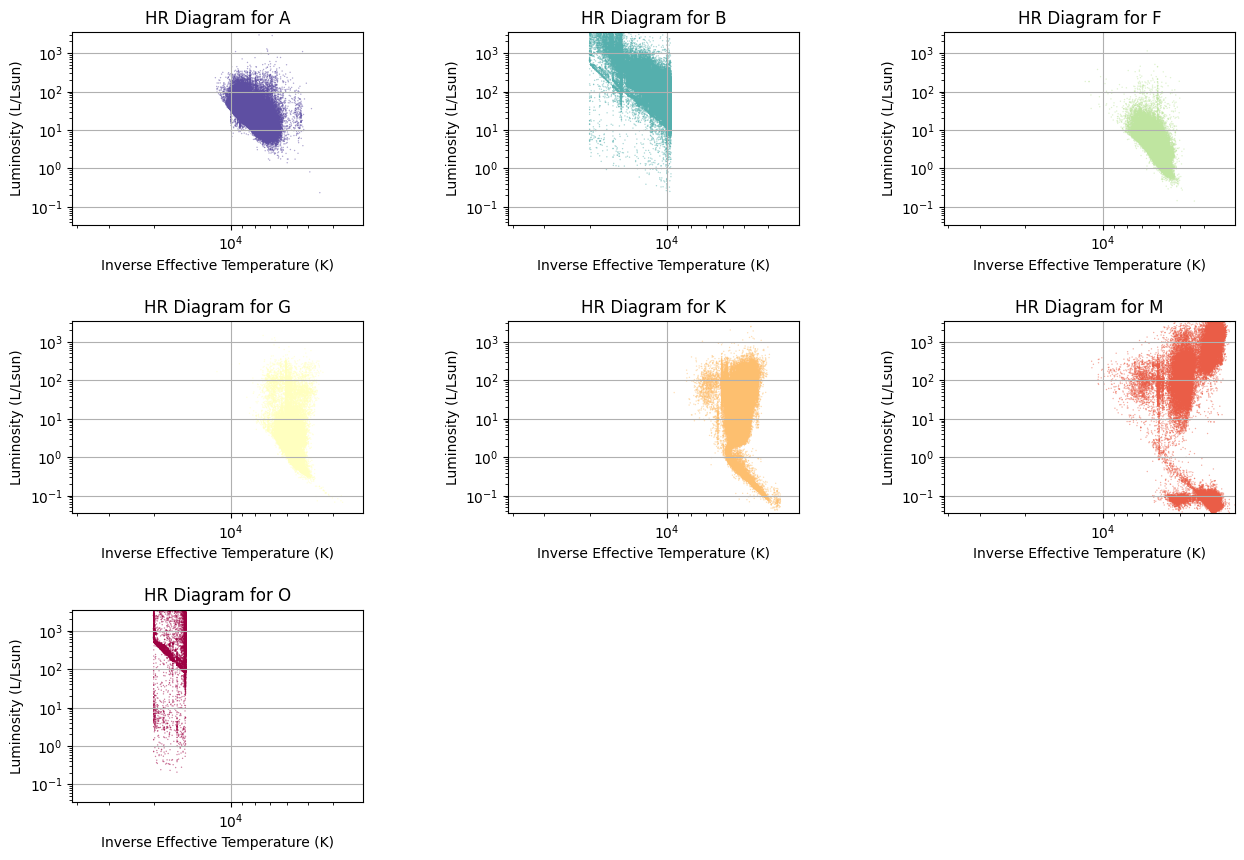

In [9]:
fig, axes = plt.subplots(nrows=(len(unique_spectral_types) + 2) // 3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.flatten()

x_min = np.nanmin(temperature)
x_max = np.nanmax(temperature)
y_min = np.nanmin(luminosity)
y_max = np.nanmax(luminosity)

for i, j in enumerate(spectral_type_to_color.items()):  
    spectral_type, color = j
    plot_df = df.filter(pl.col('SpType-ELS') == spectral_type)
    temp = plot_df['Teff'].to_numpy()  
    lum = plot_df['Lum-Flame'].to_numpy()  
    
    ax = axes[i]
    sc = ax.scatter(temp, 
                    lum,
                    c=[color],
                    s=1,
                    alpha=0.5, 
                    edgecolor='none'
                   )
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.invert_xaxis()
    ax.set_xlabel('Inverse Effective Temperature (K)')
    ax.set_ylabel('Luminosity (L/Lsun)')
    ax.set_title(f'HR Diagram for {spectral_type}')
    ax.grid(True)

# Hide any unused subplots
for i in range(len(unique_spectral_types), len(axes)):
    axes[i].axis('off')
    
plt.savefig('HR_cat.png', transparent=True)


Now let's take a look to the radius as a function of the temperature. The radius is expressed as a ratio of the sun radius

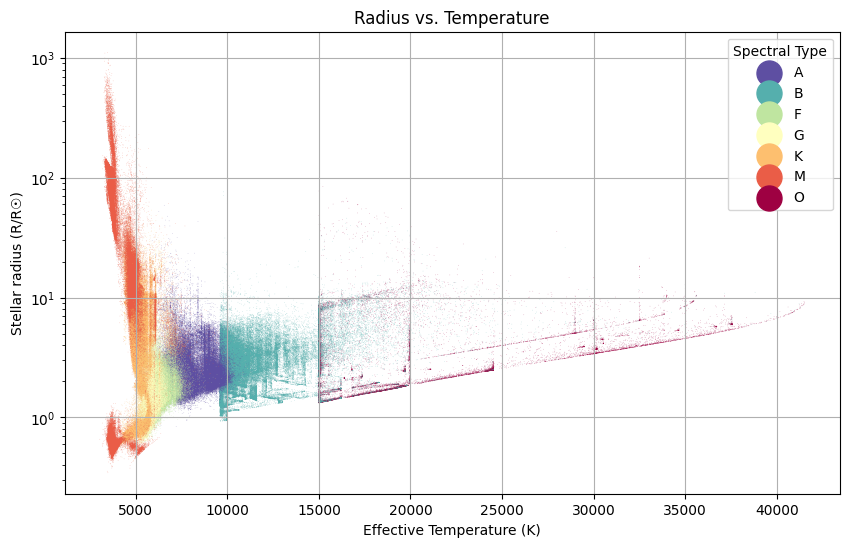

In [10]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Teff'].to_numpy(), 
            df['Rad'].to_numpy(), 
            c=colors, 
            alpha=0.5,
            s=0.2,
            edgecolor='none'
           )

plt.yscale('log')
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Stellar radius (R/R☉)')
plt.title('Radius vs. Temperature')

for stype, color in spectral_type_to_color.items():
    plt.scatter([], [], c=[color], label=stype)

plt.legend(loc='upper right', title='Spectral Type', markerscale=3)
plt.grid(True)
plt.savefig('Temp_radius.png', transparent=True)

These plots are classical astronomic plots. Let's now inspect some of the features of the dataset. We will process by group of attributes.

In [11]:
def generate_data(df,
                 feature_name
                 ):
    data = (
        df
        .select(['SpType-ELS', feature_name])
        .drop_nulls(feature_name)
        .group_by(pl.col('SpType-ELS'))
        .agg(pl.col(feature_name))
        .sort(pl.col('SpType-ELS'))
    )[feature_name].to_numpy()
    
    s_types = df['SpType-ELS'].unique().sort().to_numpy().tolist()
    x = [''] + s_types
    
    return (x, data)

def format_ax(ax, 
              title, 
              xaxis_title, 
              yaxis_title, 
              log_scale
             ):
    
    if log_scale:
        ax.set_yscale('log')
    if title:
        ax.set_title(title)
    if xaxis_title:
        ax.set_xlabel(xaxis_title)
    if yaxis_title:
        ax.set_ylabel(yaxis_title)
    
    return ax

def boxplot_feature(df, 
                    feature_name, 
                    title = None, 
                    xaxis_title = None,                    
                    yaxis_title = None, 
                    log_scale = False, 
                    ax=None
                   ):
    
    x, data = generate_data(df, feature_name)
    
    box = ax.boxplot(data, 
                      notch=False, 
                      patch_artist=True,
                      flierprops=dict(markersize=2), 
                      medianprops=dict(color='black', linewidth=2.5)
                     )

    ax = format_ax(ax=ax, 
                  title=title, 
                  xaxis_title=xaxis_title, 
                  yaxis_title=yaxis_title, 
                  log_scale=log_scale)
        
    for patch, color in zip(box['boxes'], my_colors):
        patch.set_facecolor(color)
        
    plt.xticks(range(len(x)), x)
    return box


def violinplot_feature(df, 
                      feature_name, 
                      title = None, 
                      xaxis_title = None,                    
                      yaxis_title = None, 
                      log_scale = False, 
                      ax=None
                     ):

    x, data = generate_data(df, feature_name)

    violin = ax.violinplot(data, 
                          showmedians=True,
                          widths=0.9,
                          bw_method='scott',
                          )
   

    for pc, color in zip(violin['bodies'], my_colors):
        pc.set_facecolor(color)        

    plt.xticks(range(len(x)), x)

    return violin


In [12]:
def plot_subplots(data_to_plot, df, plot_func=boxplot_feature):
    s_types = df['SpType-ELS'].unique().sort().to_numpy().tolist()
    x = [''] + s_types
    
    nrows = len(data_to_plot) // 3 + (len(data_to_plot) % 3 > 0)

    fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(20, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    axes = axs.flatten()

    for i, d in enumerate(data_to_plot):
        row = i // 3
        col = i % 3

        my_plot = plot_func(df, **d, ax=axs[row, col])
        axs[row, col].set_title(d['title'])
        axs[row, col].set_xticks(range(len(x)), x)
    
    for i in range(len(data_to_plot), len(axes)):
        axes[i].axis('off')


    return my_plot

Let's start with the common properties:
* Teff: Estimated effective temperature of the celestial object by Gaia in Kelvins.
* Dist: Distance to the celestial object: inverse of the parallax, in parsecs.
* Rad: Object radius estimate in terms of solar radius.
* Lum-Flame: Estimated object luminosity in terms of solar luminosity.
* Mass-Flame: Mass estimate in terms of solar mass.
* Age-Flame: Celestial object age in giga years.

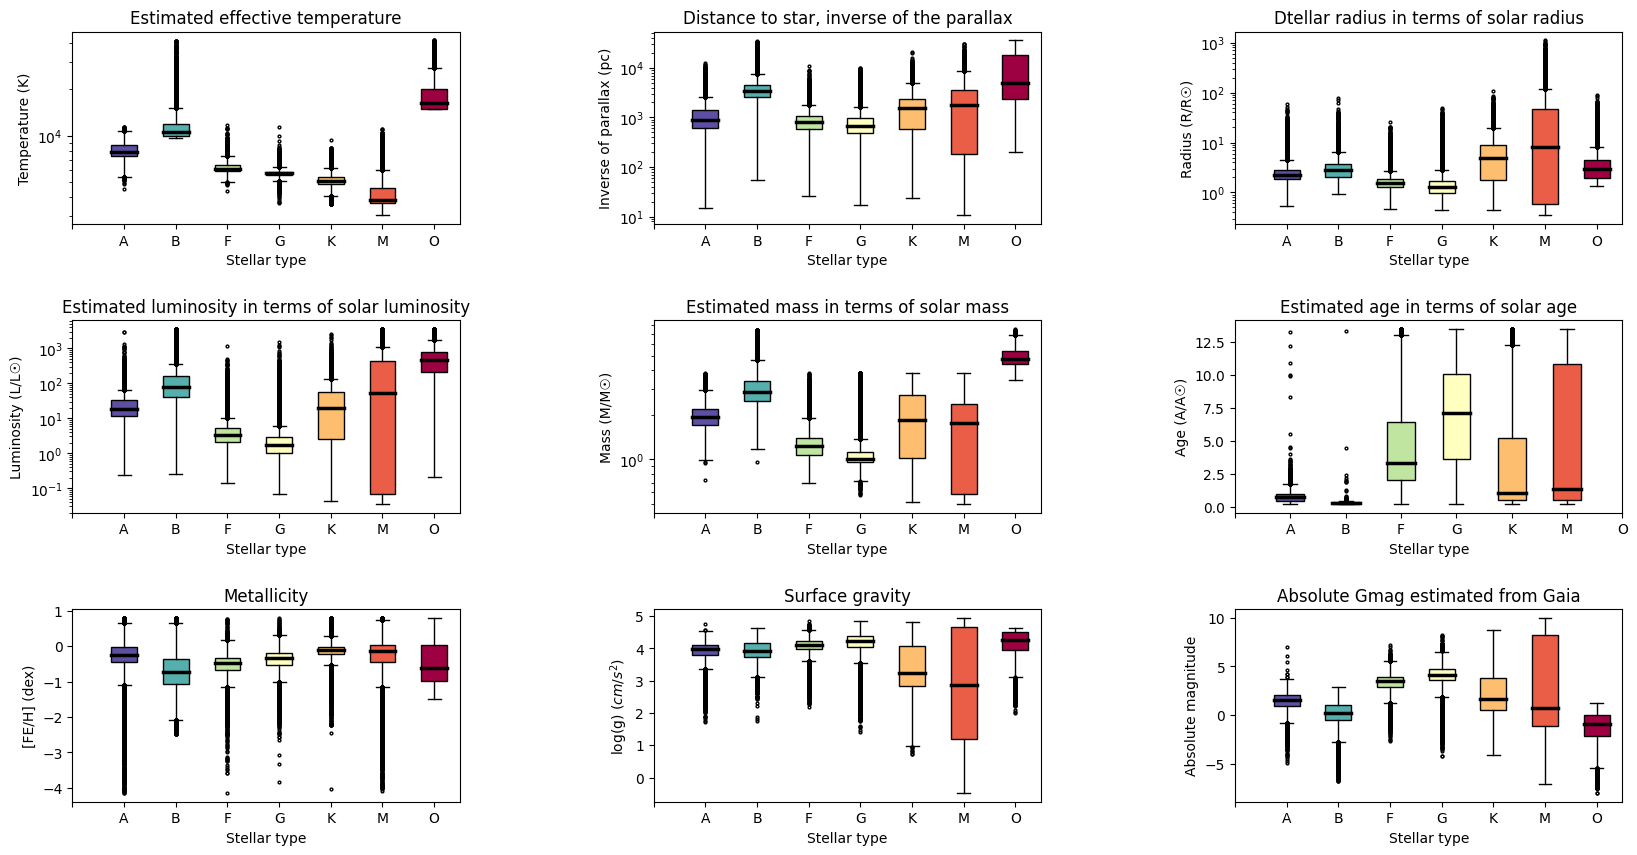

In [13]:
data_to_plot = [
    dict(
        feature_name='Teff', 
        title = 'Estimated effective temperature', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Temperature (K)', 
        log_scale = True
    ),
    dict(
        feature_name = 'Dist', 
        title = 'Distance to star, inverse of the parallax', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Inverse of parallax (pc)', 
        log_scale = True
    ), 
    dict(
        feature_name = 'Rad', 
        title = 'Dtellar radius in terms of solar radius', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Radius (R/R☉)', 
        log_scale = True
    ), 
    dict(
        feature_name = 'Lum-Flame', 
        title = 'Estimated luminosity in terms of solar luminosity', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Luminosity (L/L☉)', 
        log_scale = True
    ),
    dict(
        feature_name = 'Mass-Flame', 
        title = 'Estimated mass in terms of solar mass', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Mass (M/M☉)', 
        log_scale = True
    ),
    dict(
        feature_name = 'Age-Flame', 
        title = 'Estimated age in terms of solar age', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Age (A/A☉)', 
        log_scale = False
    ),
    dict(
        feature_name = '[Fe/H]', 
        title= 'Metallicity',
        xaxis_title='Stellar type', 
        yaxis_title = '[FE/H] (dex)',
        log_scale=False        
    ),
    dict(
        feature_name = 'logg', 
        title= 'Surface gravity',
        xaxis_title='Stellar type', 
        yaxis_title = 'log(g) $(cm/s^2)$',
        log_scale=False        
    ),
    dict(
        feature_name = 'GMAG',
        title = 'Absolute Gmag estimated from Gaia',
        xaxis_title = 'Stellar type',
        yaxis_title='Absolute magnitude',
        log_scale=False,
    )
]

plot = plot_subplots(data_to_plot, df)
plt.savefig('stats_1.png', transparent=True)

We can already spot some differences between the stars types in these boxplots. We'll perform a correlation analysis later. We can see that we don't have any data for the age of the `O` type stars, so we won't take this feature into consideration in the analysis. Regarding the distance, we can see that the minimums ($-3\sigma$) and maximums ($+3\sigma$) are very far away for each types, so we won't use this feature as well. Additionaly the distance of a star from earth is not an indicator of the type of star (domain knowledge). We can already say the the class of class `M` will be the challenging ones.

Let's perform the same analysis on the magnitude features (more info on manitude on [Wikipedia](https://en.wikipedia.org/wiki/Magnitude_(astronomy)): 

*     Gmag: Average apparent magnitude integrated in the G band.
*     BPmag: Average apparent magnitude integrated in the BP blue band.
*     RPmag: Average apparent magnitude integrated in the RP red band.
*     'GMAG': Absolute Gmag estimated from Gaia.
*     'A0': Extintion in A0 line.
*     'AG': Extintion in G band.
*     'ABP': Extintion in BP band.
*     'ARP': Extintion in RP band.

![image.png](https://upload.wikimedia.org/wikipedia/commons/6/6b/Magnitude_illustration.svg)
[CactiStaccingCrane, CC0, via Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Magnitude_illustration.svg)

Because the magnitures in this dataset is the apparent magnitude (the magnitude we see and not the magnitude of the star) we need to calculate the absolute magnitudes first. In the mean time, we will calculate the color indices and the corrected color indices.

In [14]:
df = (
    df
    .with_columns(
        Gmag_abs=pl.col('Gmag') - 5 * np.log10(pl.col('Dist')) + 5 - pl.col('AG'), 
        BPmag_abs=pl.col('BPmag') - 5 * np.log10(pl.col('Dist')) + 5 - pl.col('ABP'),
        RPmag_abs=pl.col('RPmag') - 5 * np.log10(pl.col('Dist')) + 5 - pl.col('ARP'), 
    )
    .with_columns(
        BP_RP_abs = pl.col('BPmag_abs') - pl.col('RPmag_abs'),
        BP_G_abs = pl.col('BPmag_abs') - pl.col('Gmag_abs'),
        G_RP_abs = pl.col('Gmag_abs') - pl.col('RPmag_abs')
    )
)

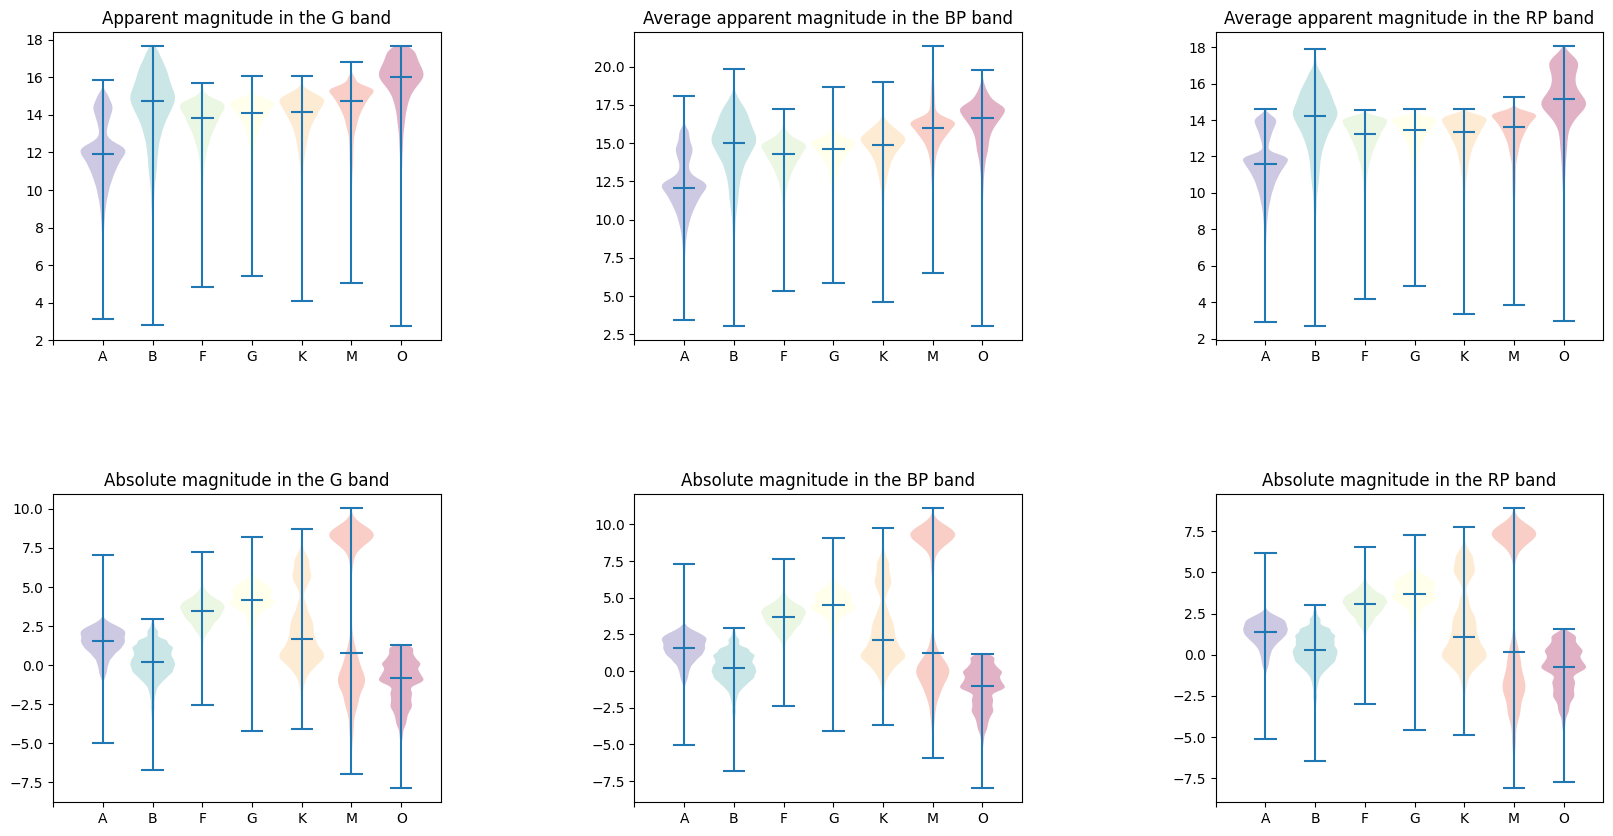

In [15]:
data_to_plot = [
    dict(
        feature_name='Gmag', 
        title = 'Apparent magnitude in the G band', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Magnitude', 
        log_scale = True
    ),
    dict(
        feature_name = 'BPmag', 
        title = 'Average apparent magnitude in the BP band', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Magnitude', 
        log_scale = True
    ), 
    dict(
        feature_name = 'RPmag', 
        title = 'Average apparent magnitude in the RP band', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Magnitude', 
        log_scale = True
    ), 
    dict(
        feature_name='Gmag_abs', 
        title = 'Absolute magnitude in the G band', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Magnitude', 
        log_scale = True
    ),
    dict(
        feature_name = 'BPmag_abs', 
        title = 'Absolute magnitude in the BP band', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Magnitude', 
        log_scale = True
    ), 
    dict(
        feature_name = 'RPmag_abs', 
        title = 'Absolute magnitude in the RP band', 
        xaxis_title = 'Stellar type',                    
        yaxis_title = 'Magnitude', 
        log_scale = True
    ), 

]
plot = plot_subplots(data_to_plot, df, violinplot_feature)

The camera of the Gaia telescope are black and white cameras. To obtain the color of the the objects captured by the telescope, we use filter that let only some specific wavelength to pass and then combine the value of each filters. Here is the detail of the filters (G, BP, RP) filters: 

![image.png](https://www.cosmos.esa.int/documents/29201/1645651/GaiaDR2Passbands.png/ba8d3078-0e7a-b316-92d9-cdce748e6484?t=1521129245183)

[source](https://www.cosmos.esa.int/web/gaia/iow_20180316)

If we want to use the colors as predictors, we need to all G, BP and RP data. We have to choose between relative or absolute magnitude, because they are linearly dependant. Let's check how each filters are related:

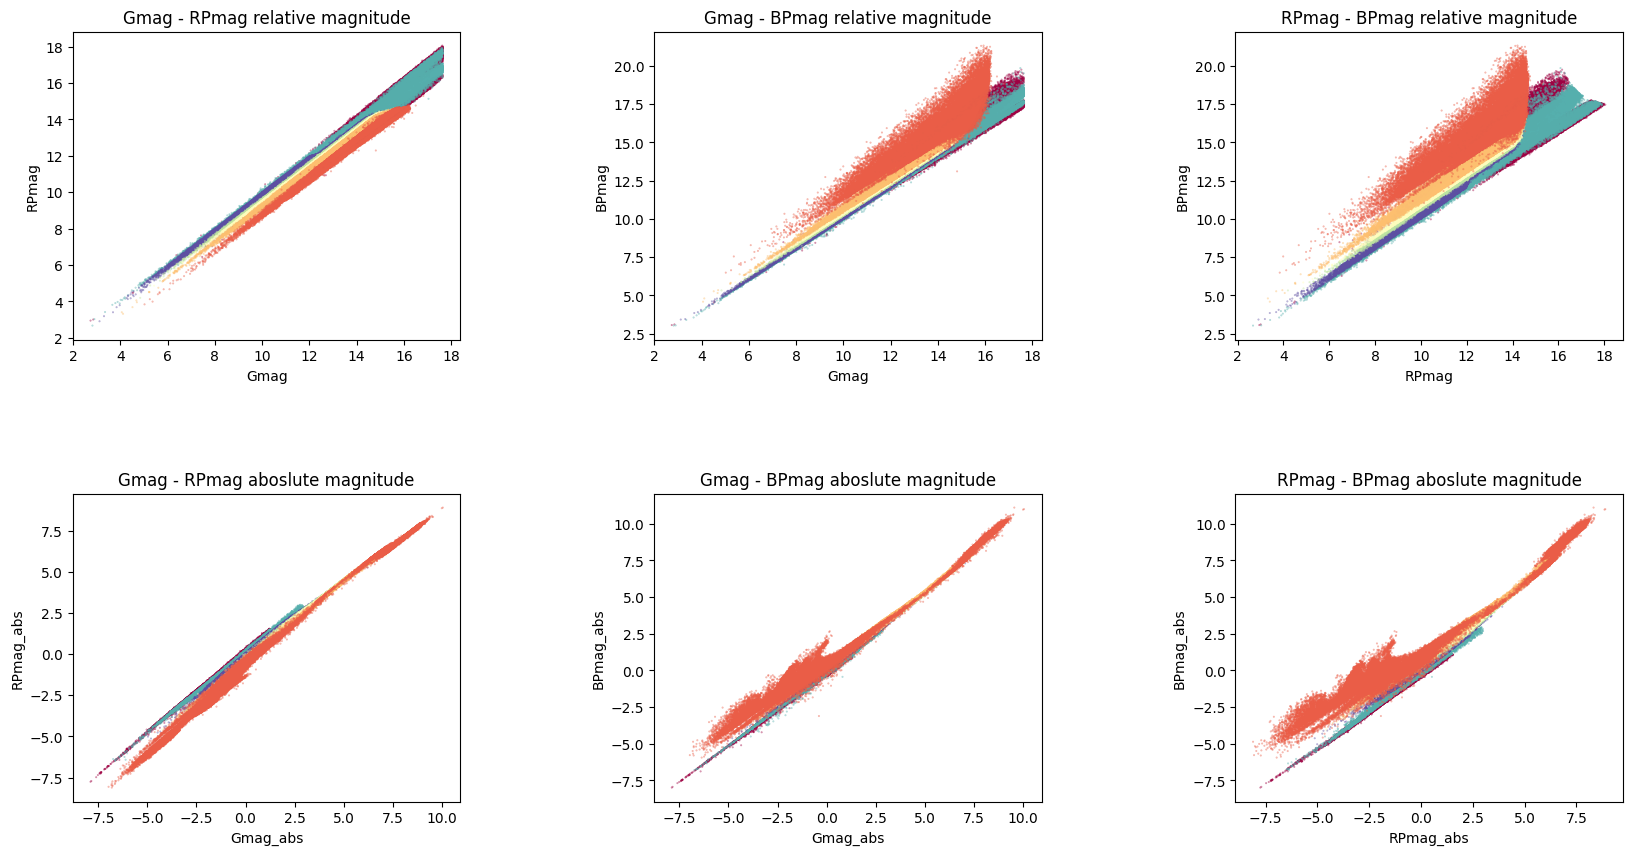

In [16]:
color_features = ['Gmag', 'RPmag', 'BPmag']
colors_couples = list(itertools.combinations(color_features, 2))

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, d in enumerate(colors_couples):
    
    x, y = d
    axs[0, i].scatter(df[x],
                      df[y], 
                      c=colors,
                      s=0.2, 
                      edgecolor=None, 
                      alpha=0.5
                     )
    axs[0, i].set_xlabel(x)
    axs[0, i].set_ylabel(y)
    axs[0, i].set_title(f'{x} - {y} relative magnitude')
        
for i, d in enumerate(colors_couples):
    x, y = d
    axs[1, i].scatter(df[x + '_abs'],
                      df[y + '_abs'], 
                      c=colors,
                      s=0.2, 
                      edgecolor=None, 
                      alpha=0.5
                     )
    axs[1, i].set_xlabel(x + '_abs')
    axs[1, i].set_ylabel(y + '_abs')
    axs[1, i].set_title(f'{x} - {y} aboslute magnitude')


plt.savefig('colors.png', transparent=True)
plt.show()


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">2. Features selection and data cleaning</h1>

Now we will make a selection of features we want to use for the classification. I choosed to keep the following features: 

* Teff: Estimated effective temperature of the celestial object by Gaia in Kelvins.
* Dist: Distance to the celestial object: inverse of the parallax, in parsecs.
* Rad: Object radius estimate in terms of solar radius.
* Lum-Flame: Estimated object luminosity in terms of solar luminosity.
* Mass-Flame: Mass estimate in terms of solar mass.
* Gmag_abs: The magnitude in the G filter
* RPmag_abs: the absolute magnitude in th RP filter 
* BPmag_abs: the aboslute magnitude int the RP filter
* logg_abs: The aboslute surface gravity


I will also keep the column `SpType-ELS` (the spectral type) as it is our target value.

In [17]:
col_to_keep = [
    'SpType-ELS',
    'Teff', 
    'logg',
    'Dist',
    'Rad',
    'Lum-Flame', 
    'Mass-Flame',
    'Gmag_abs', 
    'RPmag_abs',
    'BPmag_abs',   
]
df_work = df.select(col_to_keep)

let's check the number of null count for each column:

In [18]:
(
    df_work
    .group_by('SpType-ELS')
    .agg(pl.all().is_null().sum())
)

shape: (7, 10)
┌────────────┬──────┬──────┬──────┬───┬────────────┬──────────┬───────────┬───────────┐
│ SpType-ELS ┆ Teff ┆ logg ┆ Dist ┆ … ┆ Mass-Flame ┆ Gmag_abs ┆ RPmag_abs ┆ BPmag_abs │
│ ---        ┆ ---  ┆ ---  ┆ ---  ┆   ┆ ---        ┆ ---      ┆ ---       ┆ ---       │
│ str        ┆ u32  ┆ u32  ┆ u32  ┆   ┆ u32        ┆ u32      ┆ u32       ┆ u32       │
╞════════════╪══════╪══════╪══════╪═══╪════════════╪══════════╪═══════════╪═══════════╡
│ A          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
│ B          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 18289      ┆ 0        ┆ 0         ┆ 0         │
│ O          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 16931      ┆ 0        ┆ 0         ┆ 0         │
│ G          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
│ F          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
│ M          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 1        ┆ 0         ┆ 1         │
│ K          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
└────────────┴──────┴──────┴──────┴───┴────────────┴──────────┴───────────┴───────────┘

The null counts for the `O` type are a bit problematic. As we have only $26'016$ stars of type `O` we can't use the `Age-Flame` feature. We are missing also a lot of data for the `Lum-Flame` and `Mass-Flame`. We will take a more deep look into these two features. We also have some missing data in the same features for the stars of class `M`. As we have a lot of data for this stellar type and we will pertorm down sampling, we'll just drop the missing values for this stellar type.

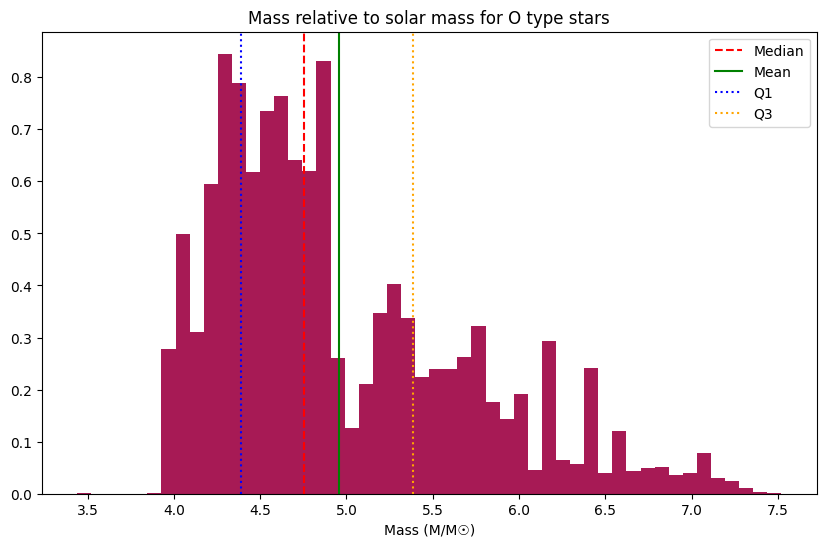

In [19]:
plt.figure(figsize=(10, 6))
plt_df = df_work.filter(pl.col('SpType-ELS') == 'O')

plt.hist(plt_df['Mass-Flame'], 
         bins=50, 
         alpha=0.9, 
         density=True, 
         color=spectral_type_to_color['O']
        )
plt.axvline(plt_df['Mass-Flame'].median(), 
            color='red', 
            linestyle='--', 
            label='Median'
           )
plt.axvline(plt_df['Mass-Flame'].mean(), 
            color='green', 
            linestyle='-', 
            label='Mean'
           )
plt.axvline(plt_df['Mass-Flame'].quantile(0.25), 
            color='blue', 
            linestyle=':', 
            label='Q1'
           )
plt.axvline(plt_df['Mass-Flame'].quantile(0.75), 
            color='orange', 
            linestyle=':', 
            label='Q3'
           )
plt.title('Mass relative to solar mass for O type stars')
plt.xlabel('Mass (M/M☉)')
plt.legend()
plt.savefig('M_MS_O.png', transparent=True)

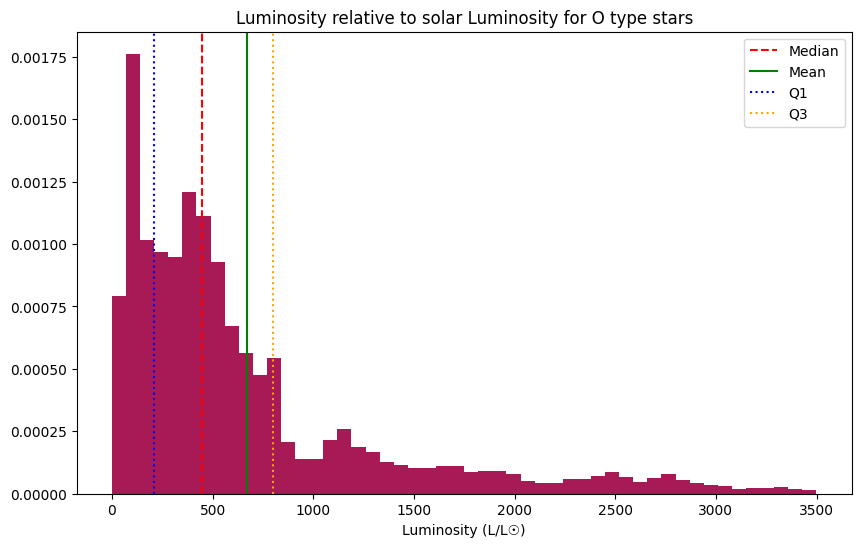

In [20]:
plt.figure(figsize=(10, 6))
plt_df = df_work.filter(pl.col('SpType-ELS') == 'O')

plt.hist(plt_df['Lum-Flame'], 
         bins=50, 
         alpha=0.9, 
         density=True, 
         color=spectral_type_to_color['O']
        )
plt.axvline(plt_df['Lum-Flame'].median(), 
            color='red', 
            linestyle='--', 
            label='Median'
           )
plt.axvline(plt_df['Lum-Flame'].mean(), 
            color='green', 
            linestyle='-', 
            label='Mean'
           )
plt.axvline(plt_df['Lum-Flame'].quantile(0.25), 
            color='blue', 
            linestyle=':', 
            label='Q1'
           )
plt.axvline(plt_df['Lum-Flame'].quantile(0.75), 
            color='orange', 
            linestyle=':', 
            label='Q3'
           )
plt.title('Luminosity relative to solar Luminosity for O type stars')
plt.xlabel('Luminosity (L/L☉)')
plt.legend()
plt.savefig('L_LS_O.png', transparent=True)

Given these plots, I choosed to replace the null values with the following approach: 

- Mass of `O` stars: replace null by the median value
- Luminosity of the `O` stars: replace null by the mean

In [21]:
mass_median = df_work.filter(pl.col('SpType-ELS') == 'O').select(pl.col('Mass-Flame')).median()
lum_mean = df_work.filter(pl.col('SpType-ELS') == 'O').select(pl.col('Lum-Flame')).mean() 

df_work = (
    df_work
    .with_columns(
        pl.when((pl.col('Mass-Flame').is_null()) & (pl.col('SpType-ELS') == 'O'))
        .then(pl.col('Mass-Flame').fill_null(mass_median))
        .otherwise(pl.col('Mass-Flame')),
                
        pl.when((pl.col('Lum-Flame').is_null()) & (pl.col('SpType-ELS') == 'O'))
        .then(pl.col('Lum-Flame').fill_null(lum_mean))
        .otherwise(pl.col('Lum-Flame'))
    )
    .drop_nulls()
)

In [22]:
(
    df_work
    .group_by('SpType-ELS')
    .agg(pl.all().is_null().sum())
)

shape: (7, 10)
┌────────────┬──────┬──────┬──────┬───┬────────────┬──────────┬───────────┬───────────┐
│ SpType-ELS ┆ Teff ┆ logg ┆ Dist ┆ … ┆ Mass-Flame ┆ Gmag_abs ┆ RPmag_abs ┆ BPmag_abs │
│ ---        ┆ ---  ┆ ---  ┆ ---  ┆   ┆ ---        ┆ ---      ┆ ---       ┆ ---       │
│ str        ┆ u32  ┆ u32  ┆ u32  ┆   ┆ u32        ┆ u32      ┆ u32       ┆ u32       │
╞════════════╪══════╪══════╪══════╪═══╪════════════╪══════════╪═══════════╪═══════════╡
│ B          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
│ A          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
│ G          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
│ O          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
│ M          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
│ F          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
│ K          ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0          ┆ 0        ┆ 0         ┆ 0         │
└────────────┴──────┴──────┴──────┴───┴────────────┴──────────┴───────────┴───────────┘

Now we don't have any more null values ! 

In [23]:
label_encoder = LabelEncoder()
label_encoder.fit(df_work['SpType-ELS'])

df_work = (
    df_work
    .with_columns(
        pl.col('SpType-ELS').map_batches(label_encoder.transform)
    )
).select(pl.all().shuffle(seed=1))

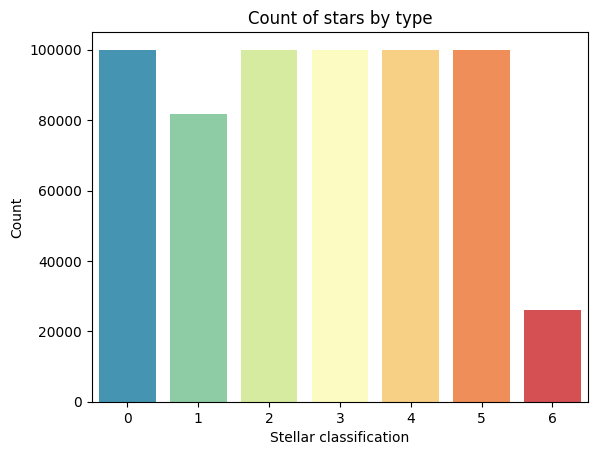

In [24]:
plot_df = (
    df_work
    .group_by(pl.col('SpType-ELS'))
    .agg(pl.len().alias('Count'))
    .sort('SpType-ELS')
)

plot = sns.barplot(x=plot_df['SpType-ELS'].to_numpy(), 
                   y=plot_df['Count'].to_numpy(), 
                   palette='Spectral_r', 
                   saturation=0.9
                  )
plot.set_title('Count of stars by type')
plot.set_xlabel('Stellar classification')
plot.set_ylabel('Count')
fig = plot.get_figure()
fig.savefig('Counts.png', transparent=True)

Let's check the correlation matrix and the pairplot.

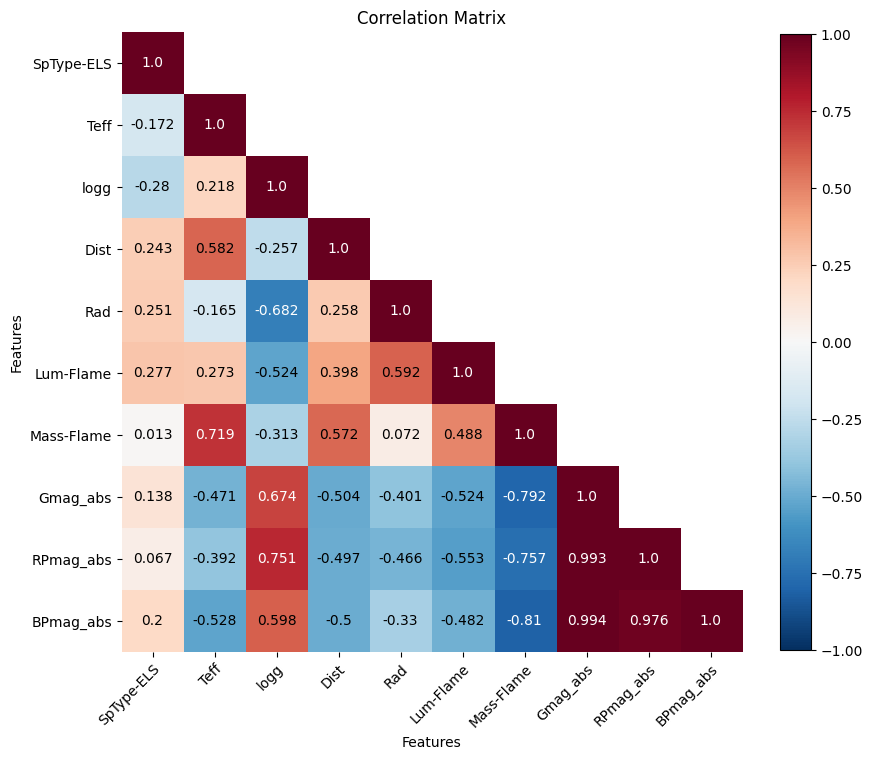

In [25]:
corr_df = df_work.corr().select(pl.all().round(3))
corr_matrix = corr_df.to_numpy()
corr_matrix[np.triu_indices(corr_matrix.shape[0], 1)] = np.nan 
cmap = plt.get_cmap('RdBu_r')

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr_matrix, cmap=cmap, vmin=-1, vmax=1)
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)

ax.set_title('Correlation Matrix')
ax.set_xlabel('Features')
ax.set_ylabel('Features')

ax.set_xticks(np.arange(len(corr_matrix)))
ax.set_yticks(np.arange(len(corr_matrix)))
ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)
ax.spines[:].set_visible(False)

plt.setp(ax.get_xticklabels(), 
         rotation=45, 
         ha="right", 
         rotation_mode="anchor")

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if i < j :
            continue
        if abs(corr_matrix[i, j]) >= 0.6:
            color = 'white'
        else:
            color = 'black'
        text = ax.text(j, 
                       i, 
                       corr_matrix[i, j], 
                       ha="center", 
                       va="center", 
                       color=color)
plt.savefig('correlation_matrix.png', transparent=True)
plt.show()


As explained the magnitudes are correlated, but we need all 3 features to express the color.

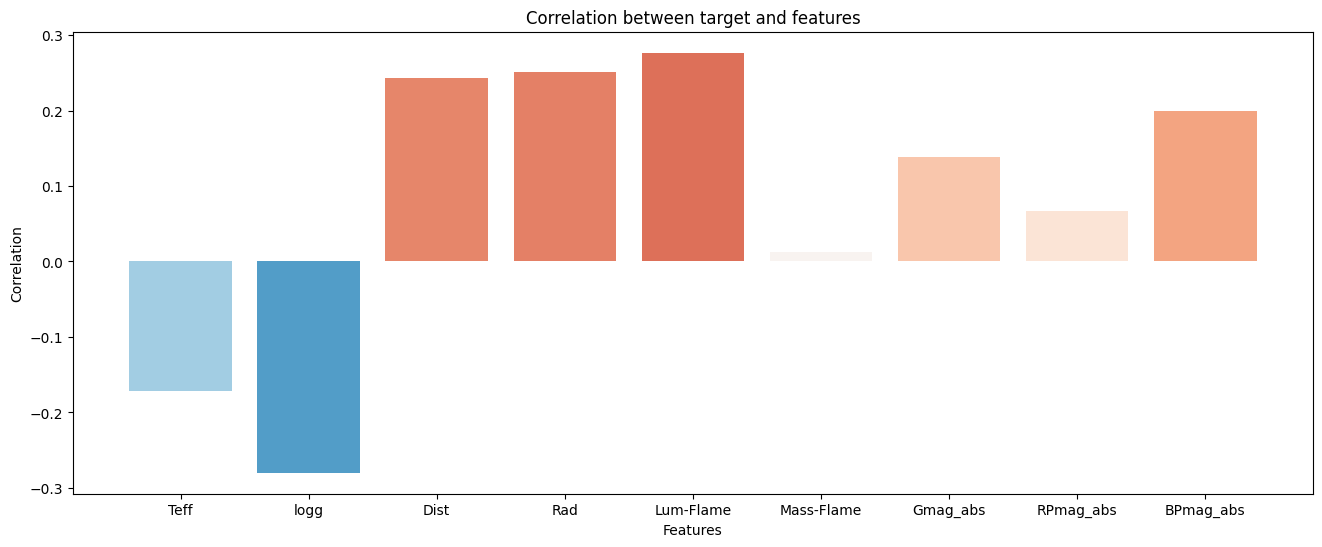

In [26]:

features = corr_df.columns[1:]
correlations = corr_df['SpType-ELS'].to_numpy()[1:]

cmap = plt.get_cmap('RdBu_r')
norm = mpl_colors.Normalize(vmin=-0.5, vmax=0.5)


fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(features, 
       correlations, 
       color=[cmap(norm(correlation)) for correlation in correlations]
      )

ax.set_title('Correlation between target and features')
ax.set_xlabel('Features')
ax.set_ylabel('Correlation')

plt.savefig('Correlation.png', transparent=True)
plt.show()


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">3. Models</h1>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Before we start the analysis, we need to split our dataset into train and test dataset

In [28]:
df_model = df_work.with_columns(pl.col('SpType-ELS').map_batches(label_encoder.inverse_transform))

X = df_model.select(pl.all().exclude('SpType-ELS')).to_numpy()
y = df_model['SpType-ELS']

scaled_X = StandardScaler().fit_transform(X)

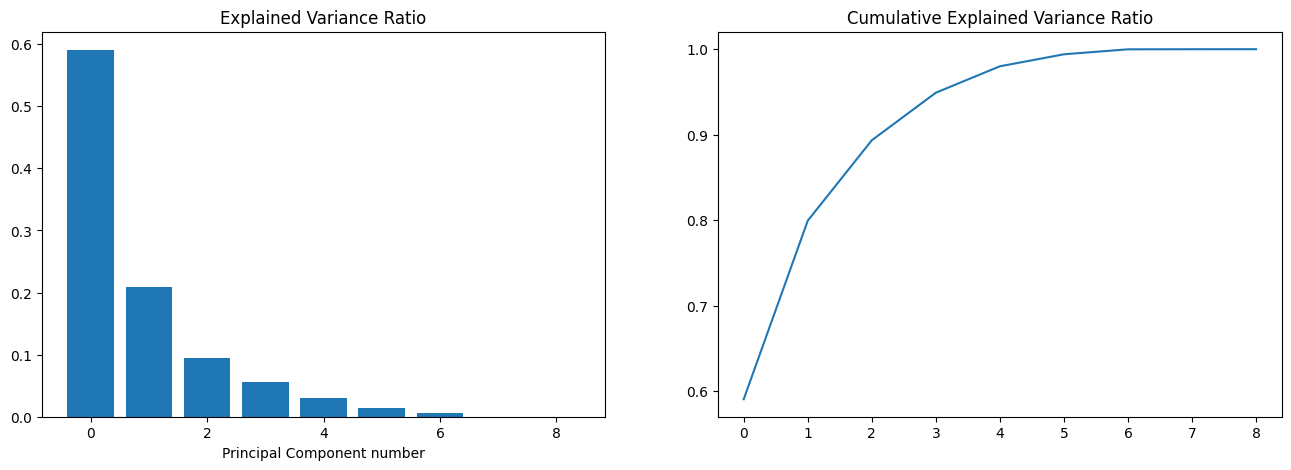

In [29]:
pca = PCA()
pca.fit(scaled_X)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].bar(range(pca.n_components_), pca.explained_variance_ratio_)
axs[0].set_xlabel('Principal Component number')
axs[0].set_title('Explained Variance Ratio')

axs[1].plot(np.cumsum(pca.explained_variance_ratio_))
axs[1].set_title('Cumulative Explained Variance Ratio')

plt.savefig('PCA.png', transparent=True)
plt.show()

With 3 components the cumulative explained variance ratio is about 0.9, hence we perform PCA with 3 components

In [30]:
pca = PCA(n_components=3, random_state=42)
pca.fit(scaled_X)
pca_X = pca.transform(scaled_X)

We also need to define a method to find the correct label mapping for the result as we are working with unsupervised models

In [31]:
def map_labels_pl(ytrue: np.array, 
                  ypred: np.array, 
                 ) -> tuple[dict, float]:

    d = dict(ytrue=ytrue, ypred=ypred)
    labels = np.unique(y)
    perms = list(itertools.permutations(range(len(labels))))
    candidates = [{label: value for label, value in zip(labels, perm)} for perm in perms]

    test_df = pl.DataFrame(d)

    for idx, candidate in enumerate(candidates):
        test_df = test_df.with_columns(
            pl.col('ytrue').replace(candidate).cast(pl.UInt8).alias(f'C_{idx}')
        )
    
    best_match = (
        test_df
        .with_columns(
            (pl.all().exclude(['ytrue', 'ypred']) == pl.col('ypred'))
        )
        .select(pl.all().exclude(['ytrue', 'ypred']))
        .sum()
        .transpose(include_header=True, column_names=['true_count'])
        .sort(by='true_count', descending=True)
        .head(1)
    ).to_dicts()[0]
    
    best_acc = best_match['true_count']/len(ypred)
    best_label_idx = int(best_match['column'].split("_")[-1])
    best_label = candidates[best_label_idx]
    
    return best_label, best_acc

We also create a function to evaluate our model

In [32]:
def plot_confusion_matrix(conf_matrix: np.ndarray, 
                          labels: list,
                          cmap: str = 'viridis',
                          title: str = 'Confusion Matrix',
                          figsize: tuple = (10, 10)) -> None:
    
    labels_vals = list(sorted(labels))
    x_sums = conf_matrix.sum(axis=0)
    y_sums = conf_matrix.sum(axis=1)
    xticks = [f'{x}\n{y}' for x, y in zip(labels_vals, x_sums)]
    yticks = [f'{x}\n{y}' for x, y in zip(labels_vals, y_sums)]
    plt.figure(figsize=figsize)
    plt.imshow(conf_matrix, cmap=cmap)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(range(conf_matrix.shape[1]), labels=xticks)
    plt.yticks(range(conf_matrix.shape[0]), labels=yticks)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            if conf_matrix[i, j] > 10000:
                color='black'
            else: 
                color='white'
            plt.text(j, 
                     i, 
                     conf_matrix[i, j], 
                     ha="center", 
                     va="center", 
                     color=color)

    plt.colorbar(fraction=0.046, pad=0.04)
    return plt

def evaluate_model(ytrue: list[str], 
                   ypred: list[int], 
                   labels: dict = None) -> None:
    
    if labels is None: 
        ypred_cat = ypred
    else:
        mapping_labels={v:k for k, v in labels.items()}
        ypred_cat = list(map(mapping_labels.get, ypred))
    
    report = classification_report(y_true=ytrue, y_pred=ypred_cat)
    conf_matrix = confusion_matrix(y_true=ytrue, y_pred=ypred_cat)
    
    print(report)
    return plot_confusion_matrix(conf_matrix, list(set(ypred_cat)))

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:left;font-weight: bold;">3.1 Unsupervised: KMeans clustering</h2>

In [33]:
kmeans_model = KMeans(n_clusters=7, n_init='auto', )
kmeans_model.fit(pca_X)
yhat_kmeans = kmeans_model.predict(pca_X)

In [34]:
kmeans_labels, kmeans_acc = map_labels_pl(y, yhat_kmeans)
print(f'The accuracy for the model is {kmeans_acc}')

The accuracy for the model is 0.4955160713874345


              precision    recall  f1-score   support

           A       0.45      0.86      0.59    100000
           B       0.80      0.68      0.73     81711
           F       0.00      0.00      0.00    100000
           G       0.43      0.90      0.58    100000
           K       0.23      0.09      0.13    100000
           M       0.74      0.44      0.55     99999
           O       0.85      0.59      0.69     26016

    accuracy                           0.50    607726
   macro avg       0.50      0.51      0.47    607726
weighted avg       0.45      0.50      0.43    607726



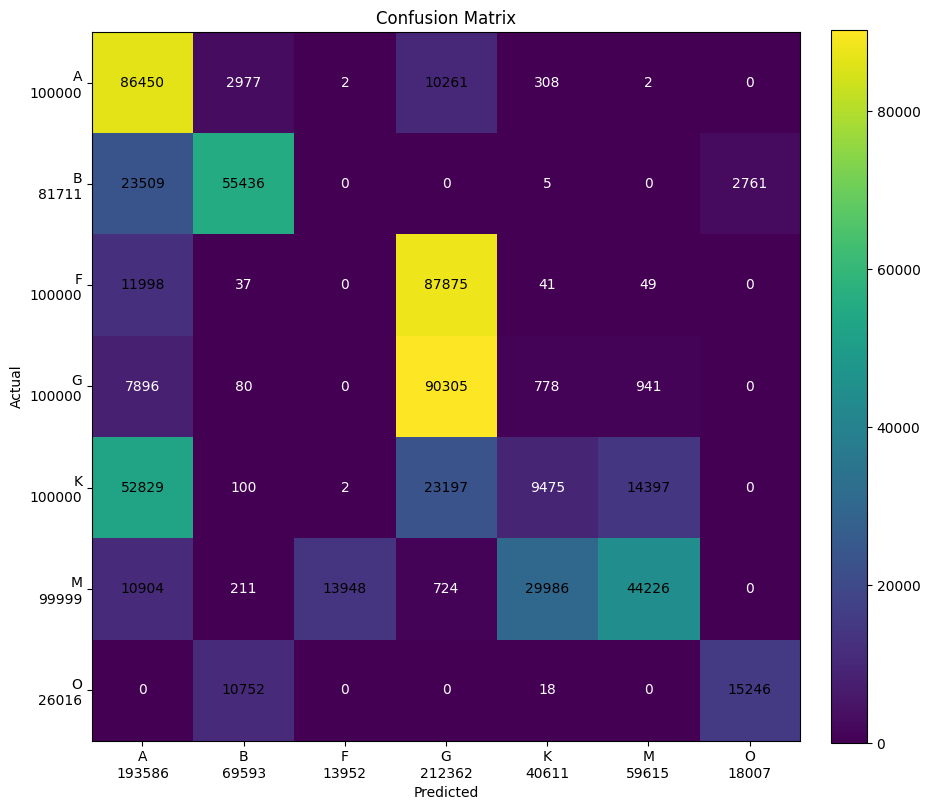

In [35]:
fig = evaluate_model(y, yhat_kmeans, kmeans_labels)
fig.savefig('kmeans.png', transparent=True)

The results for kmeans are not very good with the default parameters. The model fail to separate the stars from the `F` class and mainly classify them as `G`. We can try with another `init` value

In [36]:
kmeans_model = KMeans(n_clusters=7, n_init='auto', init='random')
kmeans_model.fit(pca_X)
yhat_kmeans = kmeans_model.predict(pca_X)

In [37]:
kmeans_labels, kmeans_acc = map_labels_pl(y, yhat_kmeans)
print(f'The accuracy for the model is {kmeans_acc}')

The accuracy for the model is 0.55177497753922


              precision    recall  f1-score   support

           A       0.52      0.91      0.66    100000
           B       0.79      0.77      0.78     81711
           F       0.00      0.00      0.00    100000
           G       0.47      0.88      0.61    100000
           K       0.47      0.34      0.40    100000
           M       0.77      0.44      0.56     99999
           O       0.84      0.61      0.70     26016

    accuracy                           0.55    607726
   macro avg       0.55      0.56      0.53    607726
weighted avg       0.51      0.55      0.50    607726



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

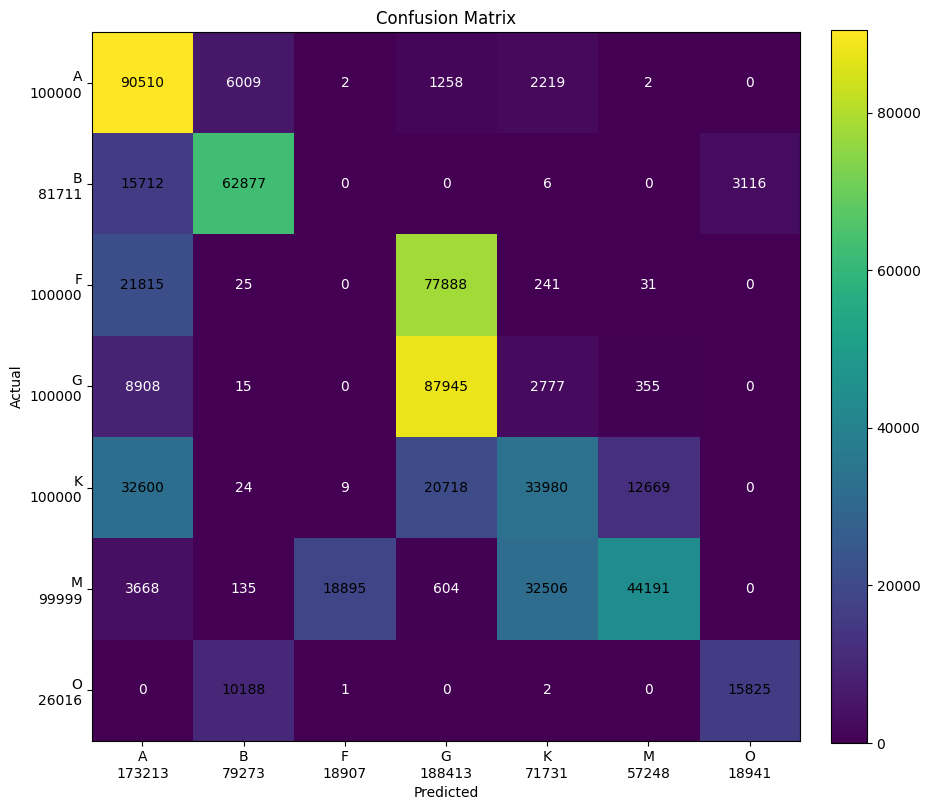

In [38]:
evaluate_model(y, yhat_kmeans, kmeans_labels)

The results are similarly bad, Kmeans seems to be a bad choice for this case.

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:left;font-weight: bold;">3.2 Unsupervised: KMeans clustering with over sampling</h2>

Here we will use SMOTE to over sample the dataset and run KMeans again.

In [39]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(pca_X, y)

In [40]:
kmeans_model = KMeans(n_clusters=7, n_init='auto', )
kmeans_model.fit(X_smote)
yhat_kmeans = kmeans_model.predict(X_smote)

In [41]:
kmeans_labels, kmeans_acc = map_labels_pl(y_smote, yhat_kmeans)
print(f'The accuracy for the model is {kmeans_acc}')

The accuracy for the model is 0.42214285714285715


              precision    recall  f1-score   support

           A       0.34      0.74      0.47    100000
           B       0.35      0.29      0.31    100000
           F       0.40      0.95      0.56    100000
           G       0.00      0.00      0.00    100000
           K       0.18      0.07      0.10    100000
           M       0.70      0.44      0.54    100000
           O       0.97      0.48      0.64    100000

    accuracy                           0.42    700000
   macro avg       0.42      0.42      0.37    700000
weighted avg       0.42      0.42      0.37    700000



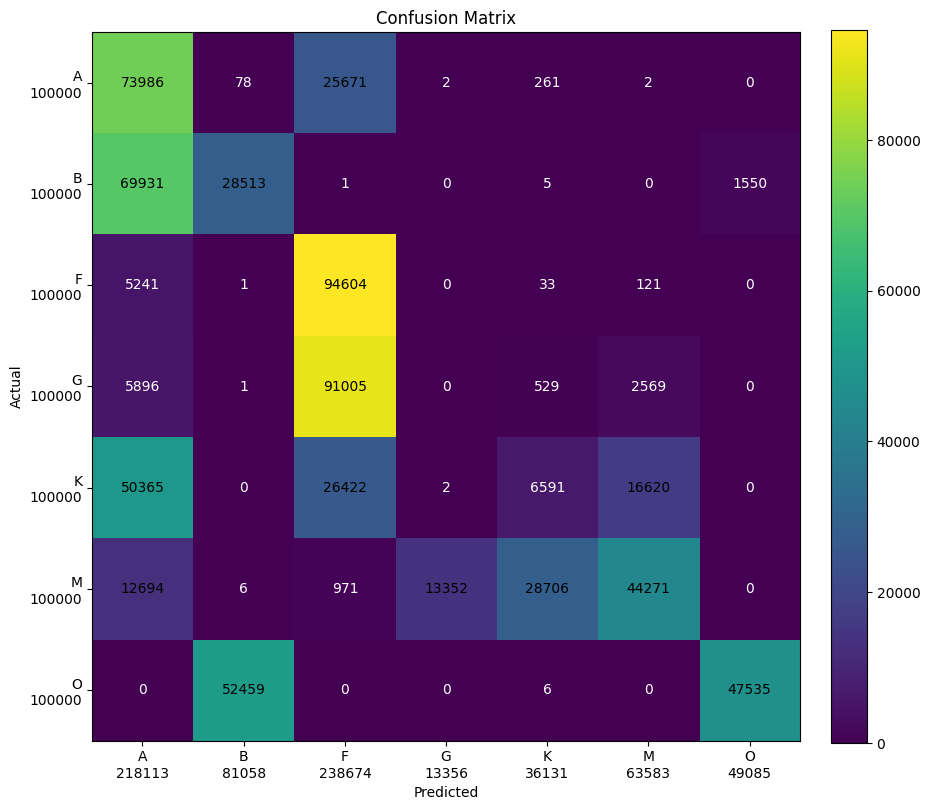

In [42]:
fig = evaluate_model(y_smote, yhat_kmeans, kmeans_labels)
fig.savefig('test.png', transparent=True)

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:left;font-weight: bold;">3.3 Supervised: Decision Tree</h2>

Now let's try with a supervised model. For this first model I choosed a Decision Tree Claassifier. First we start with the normal dataset (without over sampling). 

Our first task is to split the data into train/test datasets.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3)

In [44]:
tree = DecisionTreeClassifier()

tree.fit(X=X_train, y=y_train)
yhat_tree = tree.predict(X_test)

              precision    recall  f1-score   support

           A       0.89      0.89      0.89     29919
           B       0.95      0.95      0.95     24716
           F       0.63      0.63      0.63     30264
           G       0.56      0.56      0.56     29751
           K       0.70      0.70      0.70     30086
           M       0.85      0.85      0.85     29833
           O       0.91      0.92      0.91      7749

    accuracy                           0.76    182318
   macro avg       0.78      0.78      0.78    182318
weighted avg       0.76      0.76      0.76    182318



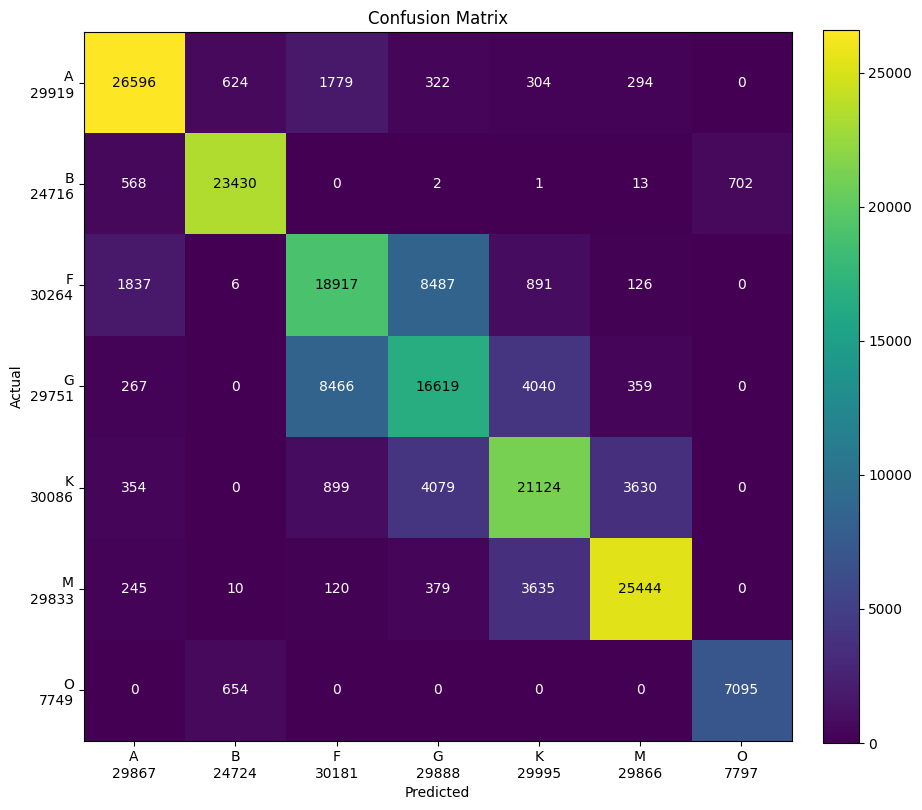

In [45]:
fig = evaluate_model(y_test, yhat_tree)
fig.savefig('dt_base.png', transparent=True)

This model is already a lot better than the previous model. Let's run hyperparamater tunning on the model.

In [46]:
parameters = {'criterion':['gini'],
              'max_depth':np.arange(5,16).tolist()[0::3],
              'min_samples_split':np.arange(2,9).tolist()[0::3],
              'max_leaf_nodes':np.arange(12,42).tolist()[0::4]}

grid = GridSearchCV(DecisionTreeClassifier(), 
                   parameters, 
                   cv=4, 
                   n_jobs=-1, 
                   )

grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 8, 11, 14],
                         'max_leaf_nodes': [12, 16, 20, 24, 28, 32, 36, 40],
                         'min_samples_split': [2, 5, 8]})

In [47]:
res = dict(
    score=grid.cv_results_['mean_test_score'], 
    time=grid.cv_results_['mean_fit_time'], 
    max_depth=grid.cv_results_['param_max_depth'].tolist(), 
    max_leaf_nodes=grid.cv_results_['param_max_leaf_nodes'].tolist(),
    min_samples_split=grid.cv_results_['param_min_samples_split'].tolist(),
)

results = pl.DataFrame(res)

results.sort('score', descending=True).head(10)


shape: (10, 5)
┌──────────┬──────────┬───────────┬────────────────┬───────────────────┐
│ score    ┆ time     ┆ max_depth ┆ max_leaf_nodes ┆ min_samples_split │
│ ---      ┆ ---      ┆ ---       ┆ ---            ┆ ---               │
│ f64      ┆ f64      ┆ i64       ┆ i64            ┆ i64               │
╞══════════╪══════════╪═══════════╪════════════════╪═══════════════════╡
│ 0.804811 ┆ 2.71216  ┆ 8         ┆ 40             ┆ 2                 │
│ 0.804811 ┆ 2.730097 ┆ 8         ┆ 40             ┆ 5                 │
│ 0.804811 ┆ 2.492039 ┆ 8         ┆ 40             ┆ 8                 │
│ 0.804811 ┆ 2.492971 ┆ 11        ┆ 40             ┆ 2                 │
│ 0.804811 ┆ 2.790861 ┆ 11        ┆ 40             ┆ 5                 │
│ 0.804811 ┆ 2.777145 ┆ 11        ┆ 40             ┆ 8                 │
│ 0.804811 ┆ 2.507773 ┆ 14        ┆ 40             ┆ 2                 │
│ 0.804811 ┆ 2.552844 ┆ 14        ┆ 40             ┆ 5                 │
│ 0.804811 ┆ 2.439458 ┆ 14        ┆ 40             ┆ 8                 │
│ 0.802909 ┆ 2.475609 ┆ 8         ┆ 36             ┆ 2                 │
└──────────┴──────────┴───────────┴────────────────┴───────────────────┘

Let's plot these results 

In [48]:
plot_df = (
    results
    .group_by(['max_depth', 'min_samples_split'])
    .all()
)

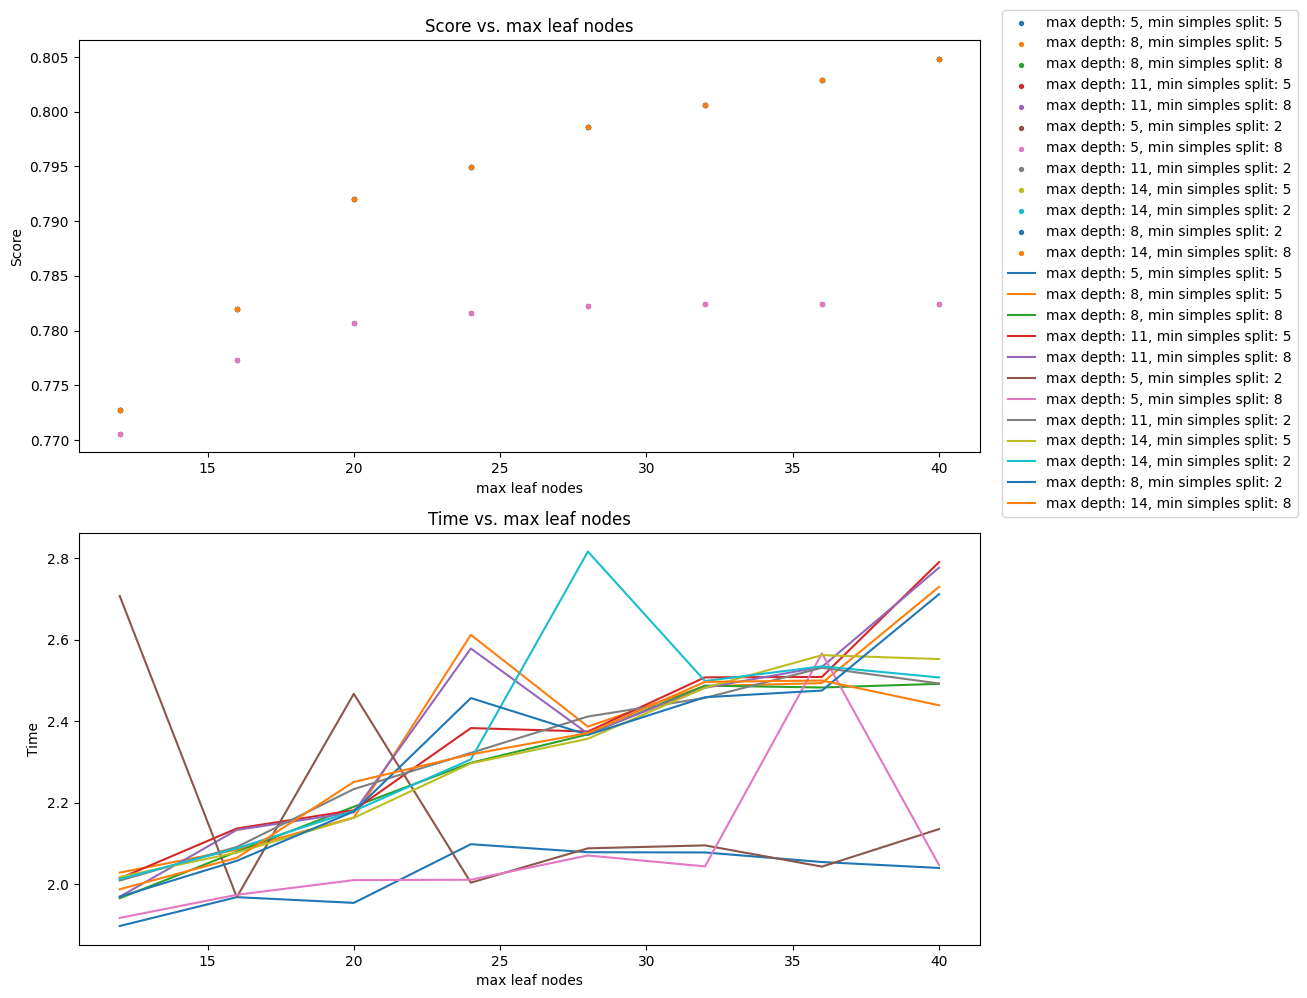

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

for row in plot_df.iter_rows(named=True):
    ax1.scatter(row['max_leaf_nodes'], 
                row['score'],
                s=8,
                label=f"max depth: {row['max_depth']}, min simples split: {row['min_samples_split']}")

ax1.set_xlabel('max leaf nodes')
ax1.set_ylabel("Score")
ax1.set_title("Score vs. max leaf nodes")

for row in plot_df.iter_rows(named=True):
    ax2.plot(row['max_leaf_nodes'], 
             row['time'],
             label=f"max depth: {row['max_depth']}, min simples split: {row['min_samples_split']}")
    
ax2.set_xlabel('max leaf nodes')
ax2.set_ylabel("Time")
ax2.set_title("Time vs. max leaf nodes")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.savefig('hyper.png', transparent=True)
plt.show()

A lot of parameter couples have similar results in score, but the time are a bit different. To inspect that we can take only the best scores and sort them by time

In [50]:
best = (
    results
    .filter(pl.col('score') == pl.col('score').max())
    .sort('time')
)
best

shape: (9, 5)
┌──────────┬──────────┬───────────┬────────────────┬───────────────────┐
│ score    ┆ time     ┆ max_depth ┆ max_leaf_nodes ┆ min_samples_split │
│ ---      ┆ ---      ┆ ---       ┆ ---            ┆ ---               │
│ f64      ┆ f64      ┆ i64       ┆ i64            ┆ i64               │
╞══════════╪══════════╪═══════════╪════════════════╪═══════════════════╡
│ 0.804811 ┆ 2.439458 ┆ 14        ┆ 40             ┆ 8                 │
│ 0.804811 ┆ 2.492039 ┆ 8         ┆ 40             ┆ 8                 │
│ 0.804811 ┆ 2.492971 ┆ 11        ┆ 40             ┆ 2                 │
│ 0.804811 ┆ 2.507773 ┆ 14        ┆ 40             ┆ 2                 │
│ 0.804811 ┆ 2.552844 ┆ 14        ┆ 40             ┆ 5                 │
│ 0.804811 ┆ 2.71216  ┆ 8         ┆ 40             ┆ 2                 │
│ 0.804811 ┆ 2.730097 ┆ 8         ┆ 40             ┆ 5                 │
│ 0.804811 ┆ 2.777145 ┆ 11        ┆ 40             ┆ 8                 │
│ 0.804811 ┆ 2.790861 ┆ 11        ┆ 40             ┆ 5                 │
└──────────┴──────────┴───────────┴────────────────┴───────────────────┘

The best model in score and time is the model with `max_depth` = 14, `max_leaf_nodes` = 40 and `min_samples_split` = 8. Let's fit a model with these parameters

In [51]:
params = best.head(1).drop(['score', 'time']).to_dicts()[0]
tree = DecisionTreeClassifier(**params)

tree.fit(X=X_train, y=y_train)
yhat_tree = tree.predict(X_test)


              precision    recall  f1-score   support

           A       0.89      0.93      0.91     29919
           B       0.96      0.89      0.93     24716
           F       0.69      0.71      0.70     30264
           G       0.66      0.62      0.64     29751
           K       0.76      0.77      0.76     30086
           M       0.90      0.87      0.88     29833
           O       0.78      0.96      0.86      7749

    accuracy                           0.80    182318
   macro avg       0.80      0.82      0.81    182318
weighted avg       0.80      0.80      0.80    182318



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

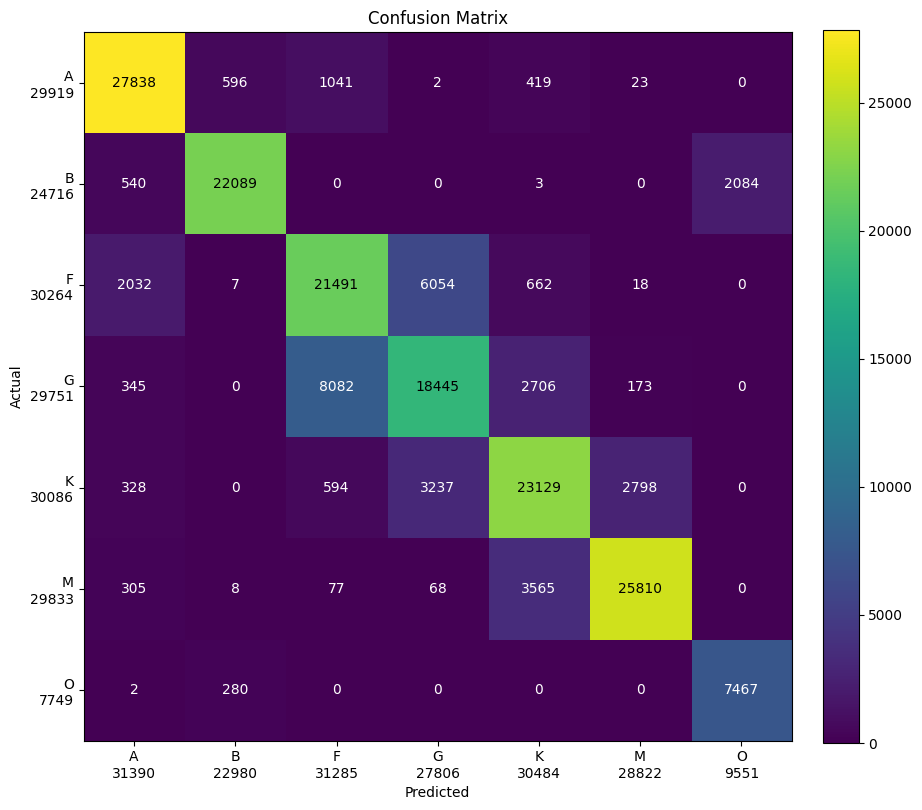

In [52]:
evaluate_model(y_test, yhat_tree)

The results are slightly better then the original model. 

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:left;font-weight: bold;">3.4 Supervised: Decision Tree with over sampling</h2>

In [53]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smote, y_smote, test_size = 0.3)

In [54]:
tree = DecisionTreeClassifier()

tree.fit(X=X_train_s, y=y_train_s)
yhat_tree = tree.predict(X_test_s)

              precision    recall  f1-score   support

           A       0.89      0.89      0.89     29930
           B       0.95      0.95      0.95     29702
           F       0.62      0.62      0.62     30274
           G       0.55      0.56      0.56     30033
           K       0.70      0.70      0.70     30105
           M       0.85      0.86      0.85     30105
           O       0.97      0.98      0.97     29851

    accuracy                           0.79    210000
   macro avg       0.79      0.79      0.79    210000
weighted avg       0.79      0.79      0.79    210000



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

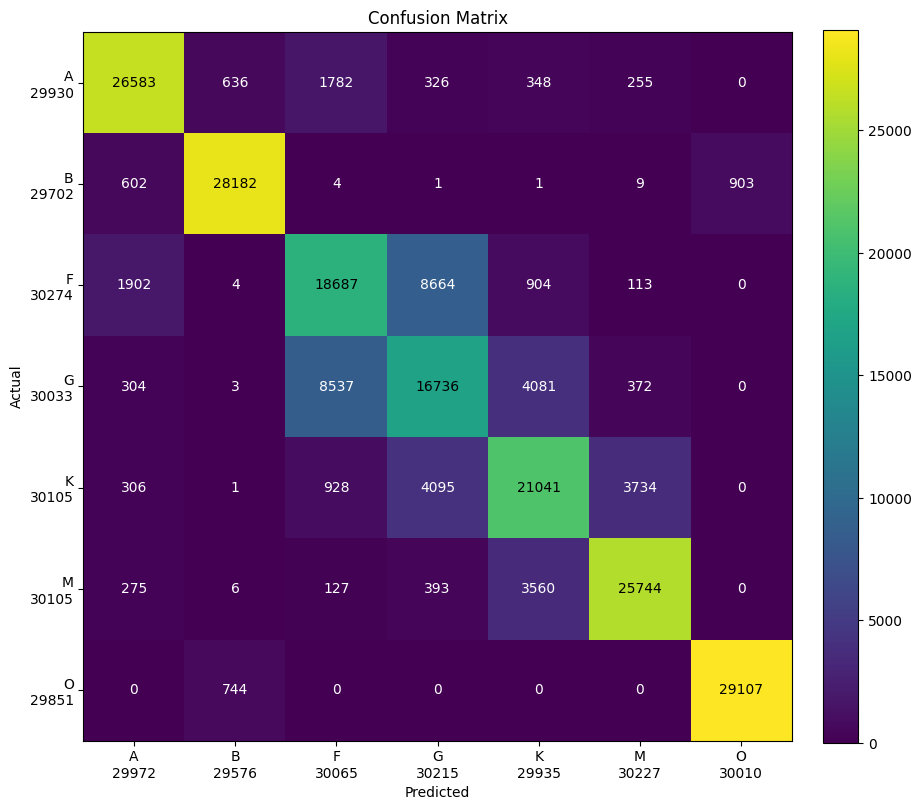

In [55]:
evaluate_model(y_test_s, yhat_tree)

In this case over sampling yield to a slightly worst result. 

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:left;font-weight: bold;">3.5 Supervised: Other methods</h2>

## Random forest

In [56]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
yhat_rf = rfc.predict(X_test)

              precision    recall  f1-score   support

           A       0.91      0.94      0.92     29919
           B       0.97      0.96      0.96     24716
           F       0.71      0.70      0.70     30264
           G       0.65      0.65      0.65     29751
           K       0.77      0.79      0.78     30086
           M       0.91      0.87      0.89     29833
           O       0.93      0.95      0.94      7749

    accuracy                           0.82    182318
   macro avg       0.84      0.84      0.84    182318
weighted avg       0.82      0.82      0.82    182318



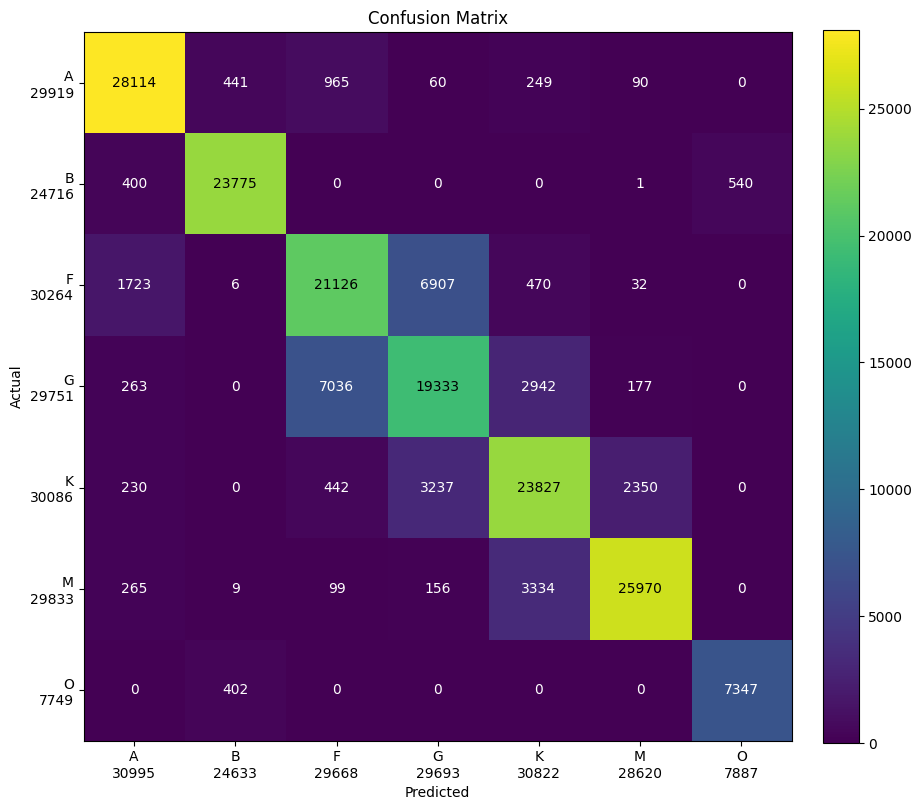

In [57]:
fig = evaluate_model(y_test, yhat_rf)
fig.savefig('rf.png', transparent=True)

Random forrest without hyper parameters tunning returns decent results, close (but better) to the random classifier

## Logistic regression

In [58]:
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
yhat_lr=lr.predict(X_test)

              precision    recall  f1-score   support

           A       0.89      0.94      0.91     29919
           B       0.88      0.92      0.90     24716
           F       0.73      0.59      0.65     30264
           G       0.57      0.74      0.65     29751
           K       0.72      0.66      0.69     30086
           M       0.88      0.82      0.85     29833
           O       0.78      0.68      0.73      7749

    accuracy                           0.77    182318
   macro avg       0.78      0.76      0.77    182318
weighted avg       0.78      0.77      0.77    182318



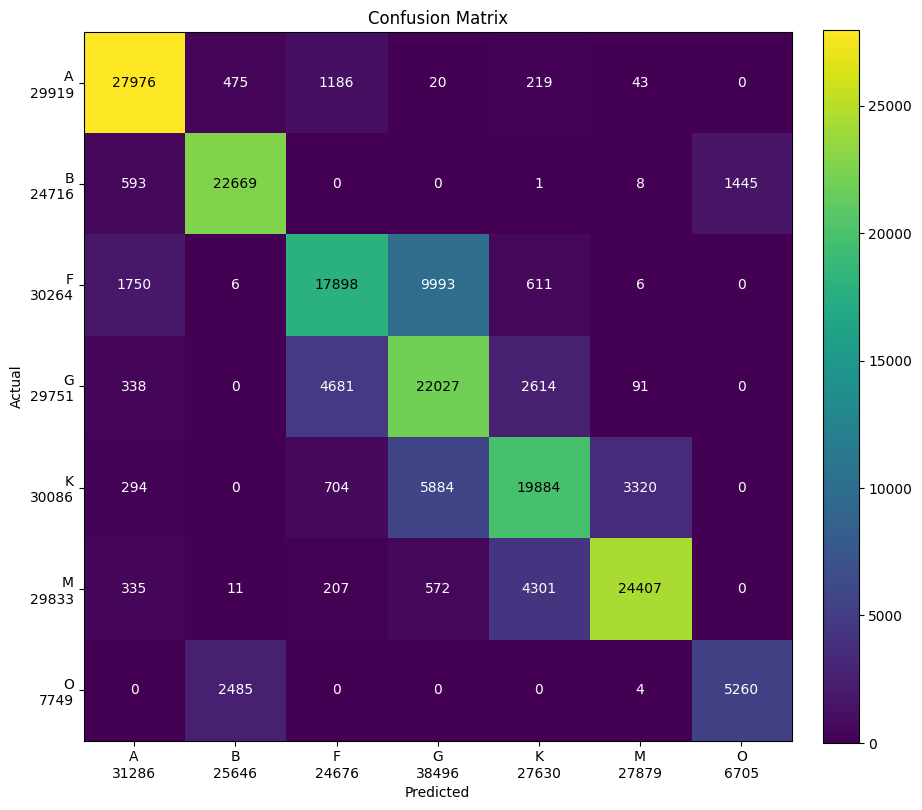

In [59]:
fig = evaluate_model(y_test, yhat_lr)
fig.savefig('lr.png', transparent=True)

Logistic regression is good as well but worst then our first Supervised model.

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:Helvetica;
           letter-spacing:0.5px;
           background-color:#3461eb;
           color:Black;
           font-family:Helvetica;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">4. Conclusion</h1>

This study initially focused on exploratory data analysis. The important point of this part was the distribution of each characteristic and the high dispersion. Then, the first modelling step was to perform a PCA reduction and keep only the first 3 principal components. The modelling sections highlighted the fact that the unsupervised approach (at least the one tested) does not fit this dataset well. The high variability of the data may be the cause of this problem. Supervised approaches were more successful.

Future work may include: 

- Fit other Unsupervised ML approaches;
- Preprocess the features (features engineering);
- Hyperparameters fine tunning for Random Forest classification and Logistic regression;

As an amateur astronomer, I will continue this project and perhaps reuse the dataset for a deep learning approach.

[github repo](https://github.com/huwilerb/star-classification-ml)